## Problem Statment (Objective, Overview of Dataset, Solution & Conclusion)

- The primary objective is to detect fraudulent transactions within the dataset accurately. This involves identifying transactions that are not legitimate and distinguishing them from legitimate ones.

- The dataset contains transaction data with 786,363 records and 29 features. It includes details such as account and customer identifiers, transaction amounts, merchant information, and indicators of fraudulent     transactions. The "isFraud" column indicates whether a transaction is fraudulent, with approximately 1.58% of transactions labeled as fraud. Missing data is observed in several columns, including "acqCountry," "posEntryMode" and "transactionType." Additionally, a subset of 12,417 records pertains to fraudulent transactions.
  
- Most businesses use rule-based systems and supervised learning models for fraud detection. These models require substantial labeled data, which can be expensive and timeconsuming to collect.

- This project proposes a semi-supervised approach, utilizing a combination of labeled fraud data and a larger pool of unlabeled data. By leveraging the unlabeled data, the model can learn broader fraud patterns and adapt to new ones efficiently.

- By analyzing transaction features and patterns, the model can help financial institutions take proactive measures to prevent fraud and minimize losses.

> Python Version

In [ ]:
import sys
sys.version

'3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]'

## Importing Library

In [ ]:
import pandas as pd #Python data Analysis Lib
import numpy as np #Numerical Python Lib
import scipy  # Scientific & Technical Python Lib
import sklearn #Supervisied Machine Learning Python Lib
import matplotlib.pyplot as plt #Visulization Python Lib
import seaborn as sns  #Visulization Python Lib
import re #Regular Expression Lib
import matplotlib.ticker as tck
import random
import statsmodels.api as sma
import plotly.express as px

In [ ]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from wordcloud import WordCloud
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,log_loss,roc_curve, roc_auc_score,cohen_kappa_score,f1_score,recall_score,precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
## Prefixing the Display Asthetics
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15, 10]

## Loading the Dataset

In [ ]:
trxn =  pd.read_csv(r'G:\Great Lakes April 2023\Capstone Project\GL Capstone\Fraud70\Fraud_Real.csv')

## Data_Glossary

- accountNumber             = The account number of The customer

- customerId    =  The ID of The customer

- creditLimit               =  The amount of money that can be charged to The debit card

- availableMoney        = The amount of money in The debit card before adjusting for pending charges      

- transactionDateTime       = The transaction timestamp when it happened
  
- transactionAmount        = The amount of transaction

- merchantName          = The merchant name of The particular transaction

- acqCountry             = The country where The merchant is located

- merchantCountryCode    = The country code for The specific merchant

- posEntryMode        = a code that tells The processor how The transaction was captured

- posConditionCode   = a code identifying transaction conditions at The point-of-sale or point-of-service

- POS Entry Mode
        
        2 - PAN auto-entry via magnetic stripe
        
        5 - PAN auto-entry via chip
        
        9 -  PAN entry via electronic commerce, including remote chip
        
        80 - Chip card at chip-capable terminal was unable to process transactions using data on the chip–terminal defaulted to magnetic stripe-read PAN
        
        99- PAN auto entry via magnetic stripe-full track data has been read without alteration or truncation
        
- POS Condition Code
        
        POS condition code 1 (Sale): This code indicates that a sale transaction has been processed. The merchant must collect the customer's signature for this type of transaction.
        
        POS condition code 8 (Void): This code indicates that a previously processed sale transaction has been voided. The merchant must not collect the customer's signature for this type of transaction.
        
        POS condition code 99 (Refund): This code indicates that a previously processed sale transaction has been refunded. The merchant must collect the customer's signature for this type of transaction.


- merchantCategoryCode    = The merchant category/types

- currentExpDate       =  The expiry date of The credit card

- accountOpenDate      = The date when The customer open The credit card

- dateOfLastAddressChange    = The last date when The customer change The credit card address

- cardCVV = The actual card verification value

- enteredCVV       = The entered card verification value

- cardLast4Digits     = The last 4 digits of The debit card

- transactionType        = The types of transactions

- isFraud      = The status of The fraud transaction

- echoBuffer    = number of delayed response transactions

- currentBalance =  The current balance of The debit card

- merchantCity = The location for The specific merchant (City)

- merchantState   = The location for The specific merchant (State)

- merchantZip = The location for The specific merchant (Zip Code)           

- cardPresent =     The physical presence of The debit card in The transaction

- posOnPremises = The location of The point of sales          

- recurringAuthInd  = wheTher The auThentication recurred or not

- expirationDateKeyInMatch = The match between The expiration date in The system and what was inputted

## Data Understanding

In [ ]:
trxn.shape # No of rows & columns

(786363, 29)

In [ ]:
trxn.describe(include=np.number) # 5 point Summary for all Numberical data

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,782309.000000,785954.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,9.049943,3.271980,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,16.774130,9.809023,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,2.000000,1.000000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,5.000000,1.000000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,9.000000,1.000000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


In [ ]:
trxn.describe(exclude=np.number) # 5 Point summary of all categorical data

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,cardPresent,expirationDateKeyInMatch,isFraud
count,786363,786363,781801,785639,786363,786363,786363,786363,785665,786363,786363,786363
unique,776637,2490,4,4,19,165,1820,2184,3,2,2,2
top,2016-12-25T14:04:15,Uber,US,US,online_retail,Mar-29,21-06-2014,15-03-2016,PURCHASE,False,False,False
freq,4,25613,774709,778511,202156,5103,33623,3819,745193,433495,785320,773946


In [ ]:
trxn.info()
#prints information Dataset index dtype and columns, non-null values & memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  float64
 10  posConditionCode          785954 non-null  float64
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [ ]:
trxn.head() #Prints the first 5 Observation & all Varaibles in the dataset

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,Jun-23,14-03-2015,14-03-2015,414,414,1803,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,Feb-24,14-03-2015,14-03-2015,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,Aug-25,14-03-2015,14-03-2015,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,Aug-25,14-03-2015,14-03-2015,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,Oct-29,06-08-2015,06-08-2015,885,885,3143,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [ ]:
trxn.rename(columns={'currentExpDate': 'CardExpiryMonth&Year'},inplace=True)

In [ ]:
trxn_columns = trxn.columns.to_list() #Prints the All Columns Names in the dataset
# can be used to validate with dataset glossary

In [ ]:
trxn_columns

['accountNumber',
 'customerId',
 'creditLimit',
 'availableMoney',
 'transactionDateTime',
 'transactionAmount',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'CardExpiryMonth&Year',
 'accountOpenDate',
 'dateOfLastAddressChange',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'transactionType',
 'echoBuffer',
 'currentBalance',
 'merchantCity',
 'merchantState',
 'merchantZip',
 'cardPresent',
 'posOnPremises',
 'recurringAuthInd',
 'expirationDateKeyInMatch',
 'isFraud']

In [ ]:
trxn.duplicated().sum() # to view any duplicated columns or rows in the dataset

0

In [ ]:
trxn['isFraud'].value_counts(normalize=True)*100

False    98.420958
True      1.579042
Name: isFraud, dtype: float64

## Data Prepration

> Creating copy of Orginal Dataset

    -> From Now we will working only in copy of the Original Datasets

    # we are creating a copy  of datasets so mulitple techniques can used on the dataset

In [ ]:
trxn_c1 =  trxn.copy()

In [ ]:
trxn_c1.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,CardExpiryMonth&Year,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,Jun-23,14-03-2015,14-03-2015,414,414,1803,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,Feb-24,14-03-2015,14-03-2015,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,Aug-25,14-03-2015,14-03-2015,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,Aug-25,14-03-2015,14-03-2015,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,Oct-29,06-08-2015,06-08-2015,885,885,3143,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


## Missing Value Imputation

In [ ]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero & Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero & Missing Values'] = 100 * mz_table['Total Zero & Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [ ]:
missing_zero_values_table(trxn_c1)

Your selected dataframe has 29 columns and 786363 Rows.
There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
echoBuffer,0,786363,100.0,786363,100.0,float64
merchantCity,0,786363,100.0,786363,100.0,float64
merchantState,0,786363,100.0,786363,100.0,float64
merchantZip,0,786363,100.0,786363,100.0,float64
posOnPremises,0,786363,100.0,786363,100.0,float64
recurringAuthInd,0,786363,100.0,786363,100.0,float64
acqCountry,0,4562,0.6,4562,0.6,object
posEntryMode,0,4054,0.5,4054,0.5,float64
merchantCountryCode,0,724,0.1,724,0.1,object
transactionType,0,698,0.1,698,0.1,object


In [ ]:
trxn_c1.loc[trxn_c1['acqCountry'] != trxn_c1['merchantCountryCode'], :]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,CardExpiryMonth&Year,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
8,830329091,830329091,5000,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,NaN,US,2.0,1.0,fastfood,Aug-32,06-08-2015,06-08-2015,885,885,3143,PURCHASE,NaN,9.37,NaN,NaN,NaN,True,NaN,NaN,False,False
470,984504651,984504651,50000,12077.98,2016-06-06T06:42:23,12.41,NYSC #331326,NaN,US,5.0,99.0,health,May-24,27-07-2015,05-05-2016,640,640,8332,PURCHASE,NaN,37922.02,NaN,NaN,NaN,False,NaN,NaN,False,False
490,984504651,984504651,50000,8510.42,2016-06-13T08:54:40,12.28,Golds Gym #752210,NaN,NaN,2.0,1.0,health,Mar-30,27-07-2015,05-05-2016,640,640,8332,PURCHASE,NaN,41489.58,NaN,NaN,NaN,False,NaN,NaN,False,False
523,984504651,984504651,50000,3680.02,2016-06-29T02:02:53,94.52,WSC #257352,US,PR,2.0,1.0,health,Nov-31,27-07-2015,25-06-2016,640,640,8332,PURCHASE,NaN,46319.98,NaN,NaN,NaN,False,NaN,NaN,False,False
832,984504651,984504651,50000,34747.32,2016-11-09T21:27:45,46.10,Planet Fitness #221810,NaN,US,2.0,1.0,health,Aug-21,27-07-2015,19-10-2016,640,640,8332,PURCHASE,NaN,15252.68,NaN,NaN,NaN,False,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785745,207667444,207667444,7500,1027.23,2016-09-09T08:28:13,169.24,discount.com,NaN,US,5.0,1.0,online_retail,Jul-29,12-12-2011,16-08-2016,235,235,9853,PURCHASE,NaN,6472.77,NaN,NaN,NaN,False,NaN,NaN,False,False
785771,207667444,207667444,7500,5224.61,2016-11-15T02:22:30,47.21,Popeyes #220449,NaN,US,5.0,1.0,fastfood,May-20,12-12-2011,16-08-2016,235,235,9853,PURCHASE,NaN,2275.39,NaN,NaN,NaN,True,NaN,NaN,False,False
785858,428856030,428856030,250,151.10,2016-06-01T19:49:51,169.09,Rodeway Inn #105130,NaN,US,9.0,8.0,hotels,Aug-29,17-08-2009,17-08-2009,990,990,7660,PURCHASE,NaN,98.90,NaN,NaN,NaN,True,NaN,NaN,False,False
786140,638498773,638498773,10000,5069.06,2016-04-07T16:04:55,82.59,KFC #237284,NaN,US,9.0,1.0,fastfood,Jun-28,17-11-2014,17-11-2014,175,175,321,PURCHASE,NaN,4930.94,NaN,NaN,NaN,True,NaN,NaN,False,False


### Observation

Both 'acqCountry' & 'merchantCountryCode' are different.

Look at the line 4
50000.0	3680.02	2016-06-29T02:02:53	94.52	WSC #257352	US	PR	02

* Here  'acqCountry' is US, the country where The merchant is located
* merchantCountryCode' is PR - Puerto Rico, the country code for The specific merchant

> Imputing the Missing Values Using Mode and Varaibles a that Need to Impute are in Category Data type, THus We have Opted for Most Common Method

In [ ]:
trxn_c1.fillna(trxn_c1.select_dtypes(include='object').mode().iloc[0],inplace=True)

> only posEntryMode & posConditionCode are in the from Pre Encoded Values however the data types is in float thus we change the Data type to Integer and Change Object Data Type  

> Imputing Varaibles which are Prencoded as Numerical Category

> Changing the Datatypes of variables That are Incorretctly Read

In [ ]:
# Imputing Varaibles which are Prencoded as Numerical Category
# Changing the Datatypes of variables That are Incorretctly Read
to_impute = ['posEntryMode','posConditionCode']

for i in to_impute:
    value_of_mode = trxn_c1[i].mode()[0]
    trxn_c1[i] = trxn_c1[i].fillna(value_of_mode)
    trxn_c1[i] = trxn_c1[i].astype('int')
    trxn_c1[i] = trxn_c1[i].astype('object')

In [ ]:
missing_zero_values_table(trxn_c1)

Your selected dataframe has 29 columns and 786363 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero & Missing Values,% Total Zero & Missing Values,Data Type
echoBuffer,0,786363,100.0,786363,100.0,float64
merchantCity,0,786363,100.0,786363,100.0,float64
merchantState,0,786363,100.0,786363,100.0,float64
merchantZip,0,786363,100.0,786363,100.0,float64
posOnPremises,0,786363,100.0,786363,100.0,float64
recurringAuthInd,0,786363,100.0,786363,100.0,float64


> Imputing Missing Values Using Random Forest Classifer

> Where We will Use Random Forest Prediction Method to Impute The Missing

> All Varaibles with Non Missing Values will Be Treated as X and Varaibles with Missing Value will be Treated as Y  

In [ ]:
trxn_c2 =  trxn.copy()  #Random Forest Classification Imputation Method

> Removing Missing Values from The Dataset

In [ ]:
trxn_c3 =  trxn.copy()  #Removing Missing Values from The Dataset

> Droping Varaibles with null values with 100%

In [ ]:
#Droping Columns using for loop
columns_to_drop = []

for i in trxn_columns:
    if trxn_c1[i].isnull().sum() / len(trxn_c1[i]) > 0.4:
        columns_to_drop.append(i)
    else:
        pass

print(columns_to_drop)

trxn_c1 = trxn_c1.drop(columns=columns_to_drop)

['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']


In [ ]:
trxn_c1.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'CardExpiryMonth&Year', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

> Dropping Variables that are irrevelant to the target and also that create confusion during Model Building

> However we check for statistically collinearity with  the target varaible for the variables we are dropping that we have decided it is irrevelant  to the target variables

> Dropping unwanted variables such as ID or Date variables

In [ ]:
col_to_irr_drop = ['merchantName','accountNumber','customerId','cardLast4Digits']

In [ ]:
for i in col_to_irr_drop:
    trxn_c1 =  trxn_c1.drop(columns=[i])
# We dropped the columns

In [ ]:
trxn_c1.head()

,creditLimit,availableMoney,transactionDateTime,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,CardExpiryMonth&Year,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,5000,5000.0,2016-08-13T14:27:32,98.55,US,US,2,1,rideshare,Jun-23,14-03-2015,14-03-2015,414,414,PURCHASE,0.0,False,False,False
1,5000,5000.0,2016-10-11T05:05:54,74.51,US,US,9,1,entertainment,Feb-24,14-03-2015,14-03-2015,486,486,PURCHASE,0.0,True,False,False
2,5000,5000.0,2016-11-08T09:18:39,7.47,US,US,9,1,mobileapps,Aug-25,14-03-2015,14-03-2015,486,486,PURCHASE,0.0,False,False,False
3,5000,5000.0,2016-12-10T02:14:50,7.47,US,US,9,1,mobileapps,Aug-25,14-03-2015,14-03-2015,486,486,PURCHASE,0.0,False,False,False
4,5000,5000.0,2016-03-24T21:04:46,71.18,US,US,2,1,fastfood,Oct-29,06-08-2015,06-08-2015,885,885,PURCHASE,0.0,True,False,False


## Feature Engineering

> We Have created new Feature Engineering variables

        - From Transaction Date Time to Transcation month, Transaction Date
        
        - From cardCVV and enteredCVV we have derived CVV_Match

        - From Transaction Date Time and Date of Last Address Change Date Difference Days is Been Extracted

In [ ]:
trxn_c1[['transcation_month','transcation_date']] = trxn_c1['transactionDateTime'].str.extract('-(\d{2})-(\d{2})').astype('object')

In [ ]:
trxn_c1['cvv_match']= trxn_c1['cardCVV'] == trxn_c1['enteredCVV']

In [ ]:
trxn_c1['cvv_match'].value_counts()

True     779348
False      7015
Name: cvv_match, dtype: int64

In [ ]:
trxn_c1['Days_after_Last Address Change'] = pd.to_datetime(trxn_c1['transactionDateTime']) - pd.to_datetime(trxn_c1['dateOfLastAddressChange']) #Date of Last Address Change and Account Ope Date

transactionDateTime

In [ ]:
trxn_c1['Days_after_Last Address Change']  = trxn_c1['Days_after_Last Address Change'].dt.days

In [ ]:
trxn_c1.drop(columns=['transactionDateTime', 'cardCVV', 'enteredCVV' , 'CardExpiryMonth&Year','dateOfLastAddressChange','accountOpenDate'],inplace=True)

In [ ]:
trxn_c1.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transcation_month,transcation_date,cvv_match,Days_after_Last Address Change
0,5000,5000.0,98.55,US,US,2,1,rideshare,PURCHASE,0.0,False,False,False,08,13,True,518
1,5000,5000.0,74.51,US,US,9,1,entertainment,PURCHASE,0.0,True,False,False,10,11,True,577
2,5000,5000.0,7.47,US,US,9,1,mobileapps,PURCHASE,0.0,False,False,False,11,08,True,605
3,5000,5000.0,7.47,US,US,9,1,mobileapps,PURCHASE,0.0,False,False,False,12,10,True,637
4,5000,5000.0,71.18,US,US,2,1,fastfood,PURCHASE,0.0,True,False,False,03,24,True,290


## Changing The Data Type and its Type of Variable

In [ ]:
trxn_c1[['acqCountry','posEntryMode','posConditionCode','merchantCategoryCode','transactionType']] = trxn_c1[['acqCountry','posEntryMode','posConditionCode','merchantCategoryCode','transactionType']].astype('category')

In [ ]:
trxn_c1[['cardPresent','expirationDateKeyInMatch','cvv_match','isFraud']] = trxn_c1[['cardPresent','expirationDateKeyInMatch','cvv_match','isFraud']].astype('object')

## Spilting the Num and Cat Variables

In [ ]:
trxn_num = trxn_c1.select_dtypes(include=np.number).columns.to_list()
trxn_cat = trxn_c1.select_dtypes(exclude=np.number).columns.to_list()

In [ ]:
trxn_num

['creditLimit',
 'availableMoney',
 'transactionAmount',
 'currentBalance',
 'Days_after_Last Address Change']

In [ ]:
trxn_cat

['acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'transactionType',
 'cardPresent',
 'expirationDateKeyInMatch',
 'isFraud',
 'transcation_month',
 'transcation_date',
 'cvv_match']

> Finding The Important Feature Using Random Forest Classifier

> However we Create Copy of trxn_c1 so While Performing EDA Analysis the Orginal Varaible arent Changed

> Creating Inference is  Much Simpler and Understandable

> Also we are Encoding the Categorical Varaibles

In [ ]:
trxc_important_feature = trxn_c1.copy()

In [ ]:
trxc_important_feature_name = trxc_important_feature.columns.to_list()

In [ ]:
LE  =  LabelEncoder()
for i in trxc_important_feature_name:
    trxc_important_feature[i] = LE.fit_transform(trxc_important_feature[i])

In [ ]:
# # https://machinelearningmastery.com/calculate-feature-importance-with-python/

# # define the model
# model    =  RandomForestClassifier()
# X        =  trxc_important_feature.drop(columns=['isFraud'],axis=1)
# y        =  trxc_important_feature['isFraud']
# # fit the model
# model.fit(X, y)
# # get importance
# importance    =  model.feature_importances_
# feature_names  =  trxc_important_feature.columns

In [ ]:
importance = np.array([0.03437781, 0.18369845, 0.19314966, 0.00166228, 0.00166431,
       0.01527315, 0.01346835, 0.03406533, 0.00506857, 0.18317961,
       0.00388732, 0.00028118, 0.06794109, 0.09653201, 0.00244737,
       0.16330352])

In [ ]:
trxn.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'CardExpiryMonth&Year', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [ ]:
feature_names = ['creditLimit',
 'availableMoney',
 'transactionAmount',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'transactionType',
 'currentBalance',
 'cardPresent',
 'expirationDateKeyInMatch',
 'transcation_month',
 'transcation_date',
 'cvv_match',
 'Days_after_Last Address Change']

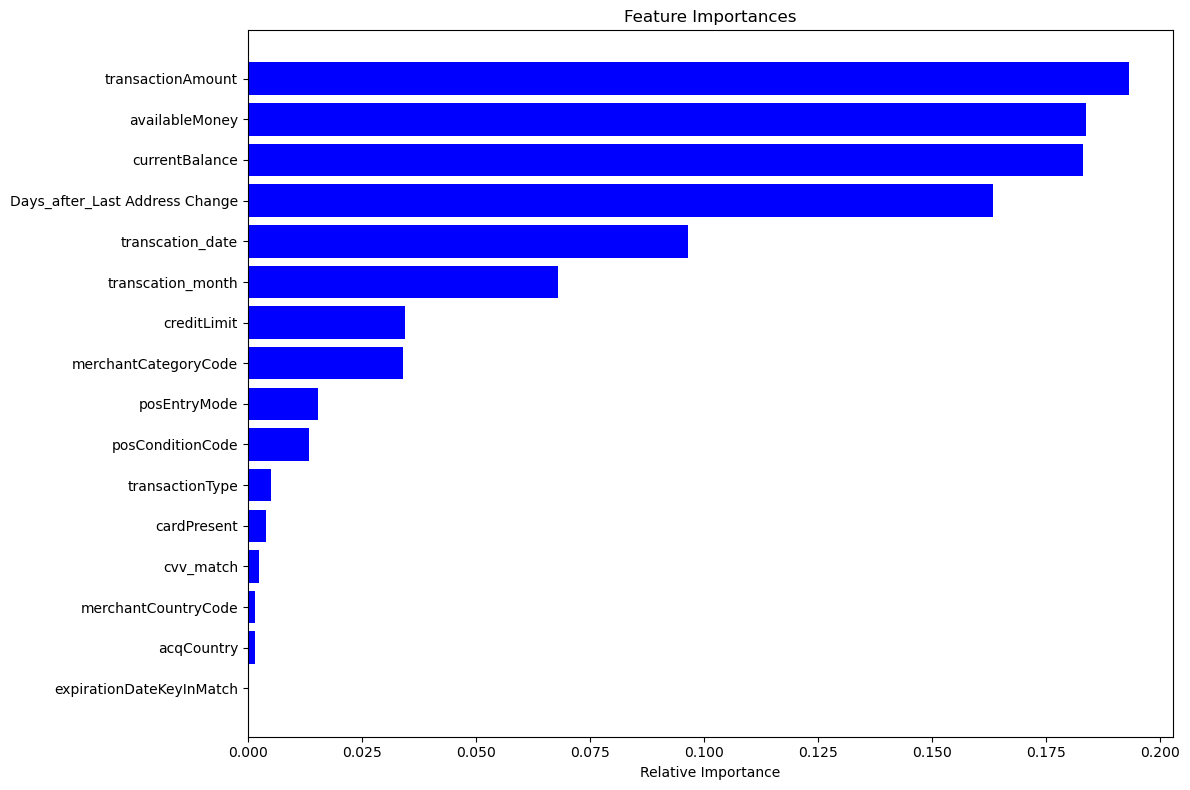

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importance)
# Create the feature importances plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

## Analysis

> Univariate Analysis

In [ ]:
# Extracting Columns for analysis

trxn_c1col =  trxn_c1.columns.to_list()
trxn_c1col.remove('isFraud')
print(trxn_c1col)

['creditLimit', 'availableMoney', 'transactionAmount', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType', 'currentBalance', 'cardPresent', 'expirationDateKeyInMatch', 'transcation_month', 'transcation_date', 'cvv_match', 'Days_after_Last Address Change']


In [ ]:
trxn_c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   creditLimit                     786363 non-null  int64   
 1   availableMoney                  786363 non-null  float64 
 2   transactionAmount               786363 non-null  float64 
 3   acqCountry                      786363 non-null  category
 4   merchantCountryCode             786363 non-null  object  
 5   posEntryMode                    786363 non-null  category
 6   posConditionCode                786363 non-null  category
 7   merchantCategoryCode            786363 non-null  category
 8   transactionType                 786363 non-null  category
 9   currentBalance                  786363 non-null  float64 
 10  cardPresent                     786363 non-null  object  
 11  expirationDateKeyInMatch        786363 non-null  object  
 12  is

In [ ]:
trxn_c1['merchantCategoryCode'].value_counts()

online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64

In [ ]:
len(trxn_c1.columns.to_list())

17

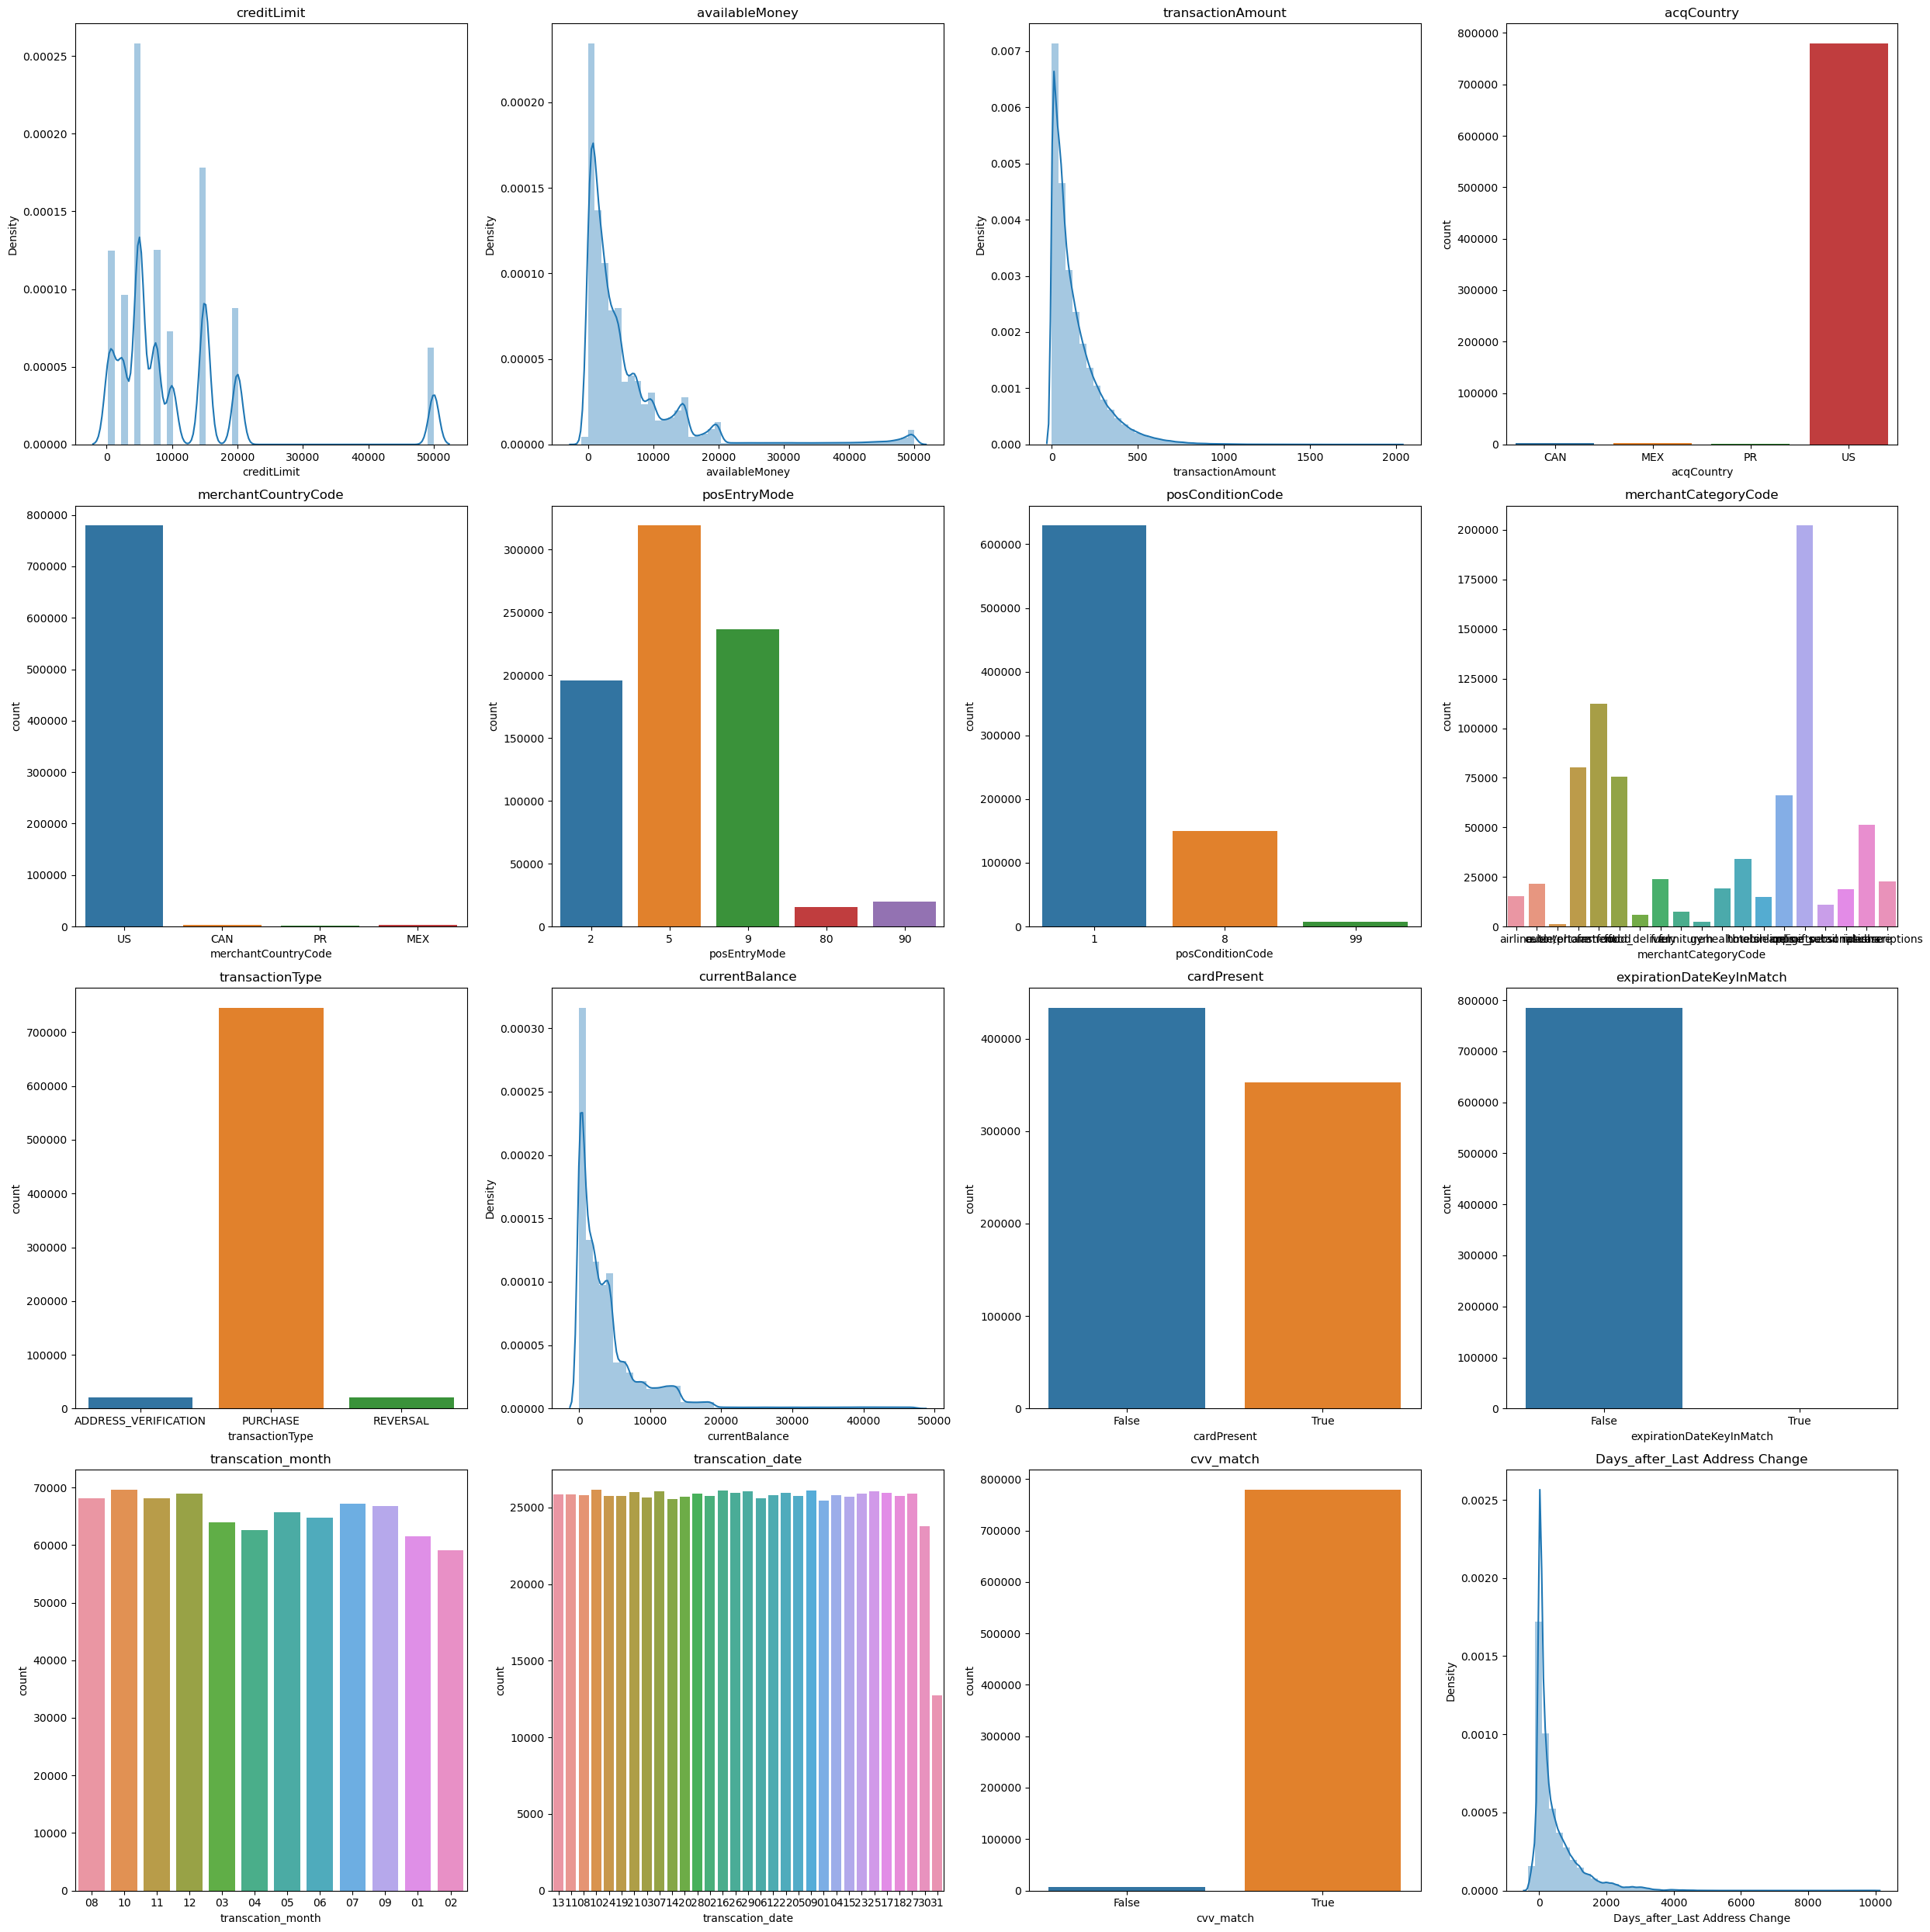

In [ ]:
fig, ax=plt.subplots(4,4, figsize=(25,25))

for i, subplot in zip(trxn_c1col,ax.flatten()):
    if pd.api.types.is_bool_dtype(trxn_c1[i]):
        sns.countplot(data =trxn_c1, x=i, ax=subplot)
        subplot.set_title(i)

    elif pd.api.types.is_categorical_dtype(trxn_c1[i]):
        sns.countplot(data =trxn_c1, x=i, ax=subplot)
        subplot.set_title(i)

    elif pd.api.types.is_object_dtype(trxn_c1[i]):
        sns.countplot(data =trxn_c1, x=i, ax=subplot)
        subplot.set_title(i)

    elif pd.api.types.is_numeric_dtype(trxn_c1[i]):
        sns.distplot(trxn_c1[i], ax=subplot,kde=True)
        subplot.set_title(i)



plt.tight_layout()
plt.show()

## Bivariate Analysis (Num Vs Target) Variables

<Axes: >

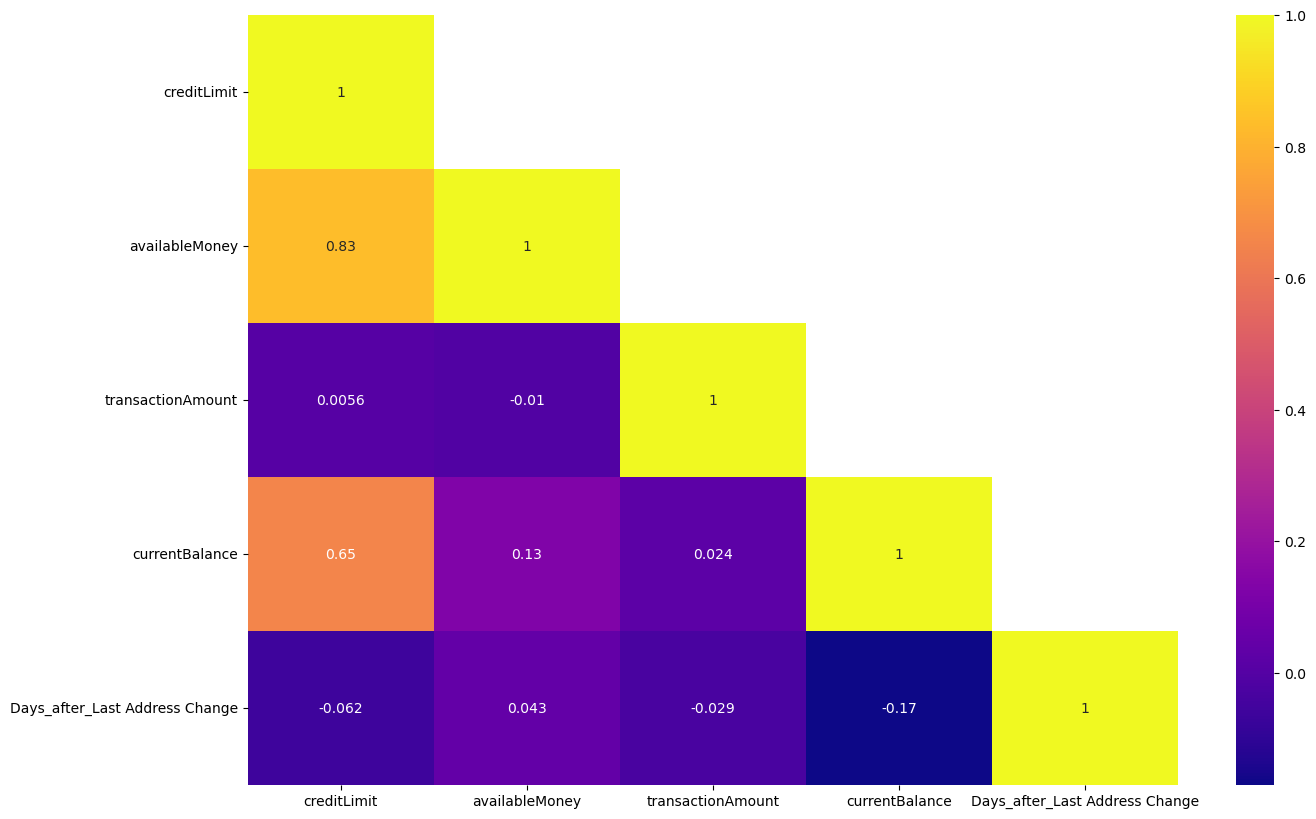

In [ ]:
sns.heatmap(trxn_c1.corr(),annot=True,mask=np.triu(trxn_c1.corr(),+1),cmap='plasma')

> Displaying Outliers on Numerical Variables in the Dataset

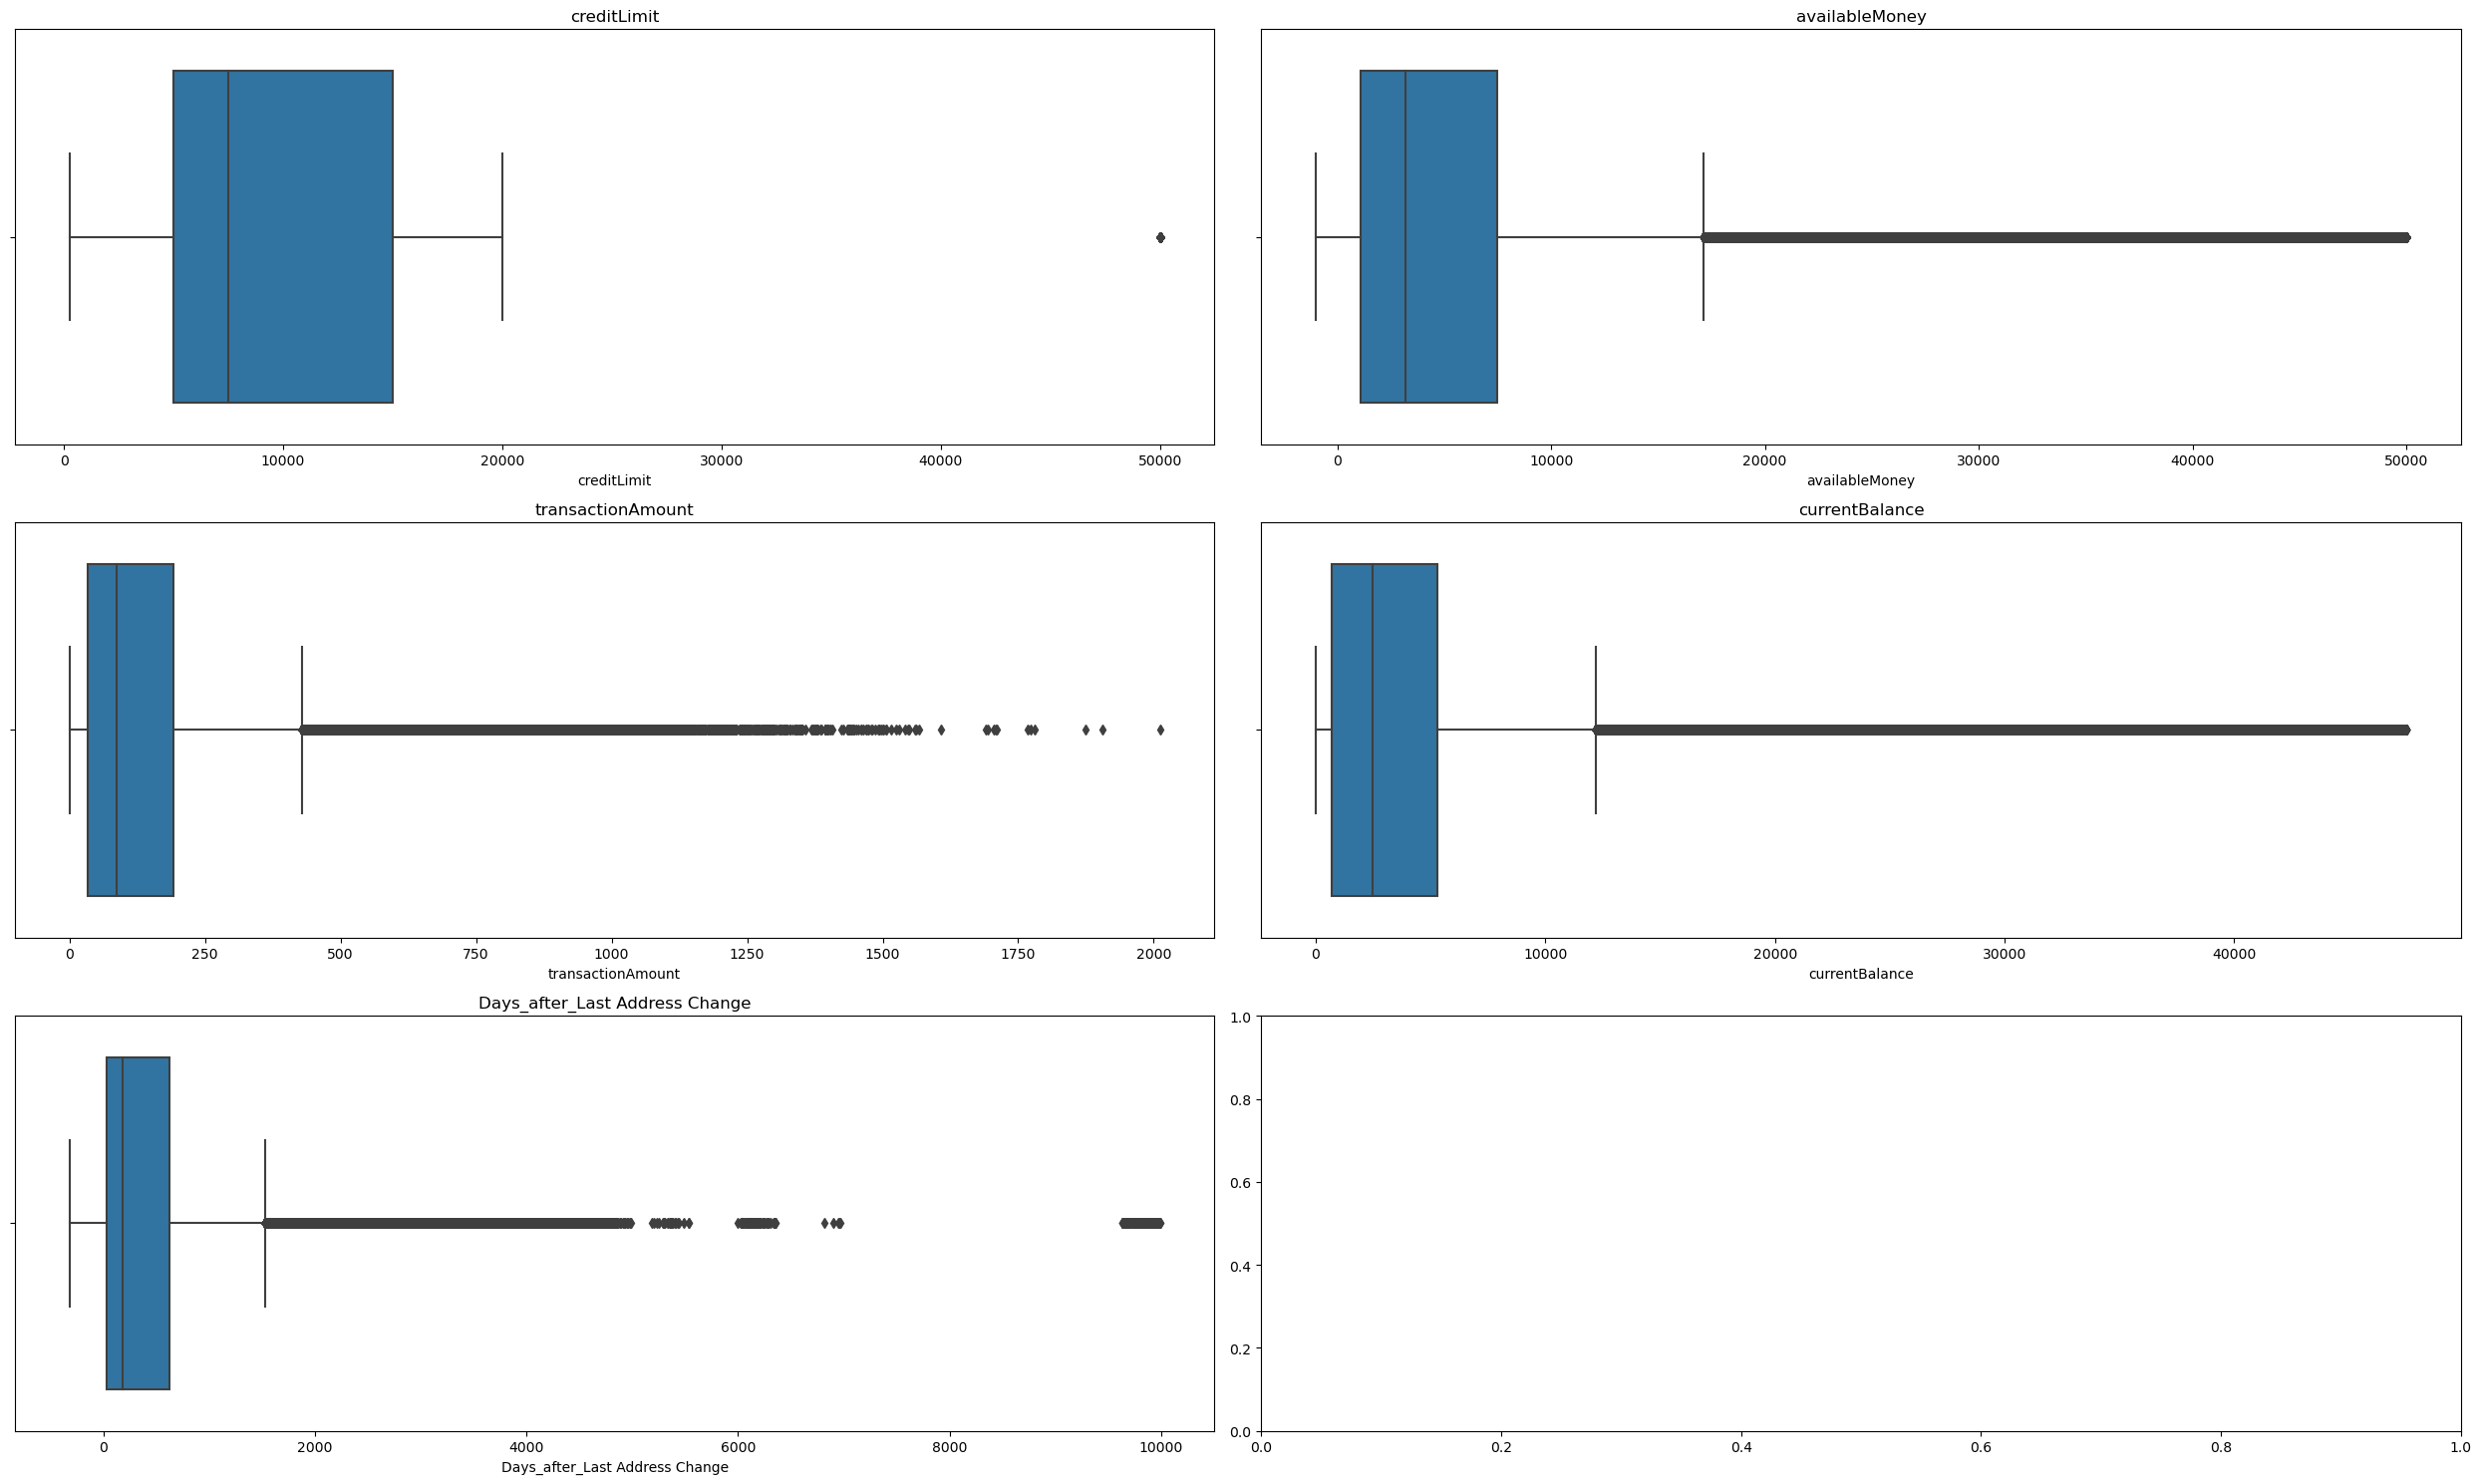

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(25, 15))

for i, subplot in zip(trxn_num, ax.flatten()):
    sns.boxplot(data=trxn_c1, x=i, ax=subplot)
    subplot.set_title(i)

plt.tight_layout()
plt.show()

> Bivariate :1 Numerical Vs Target Varaible

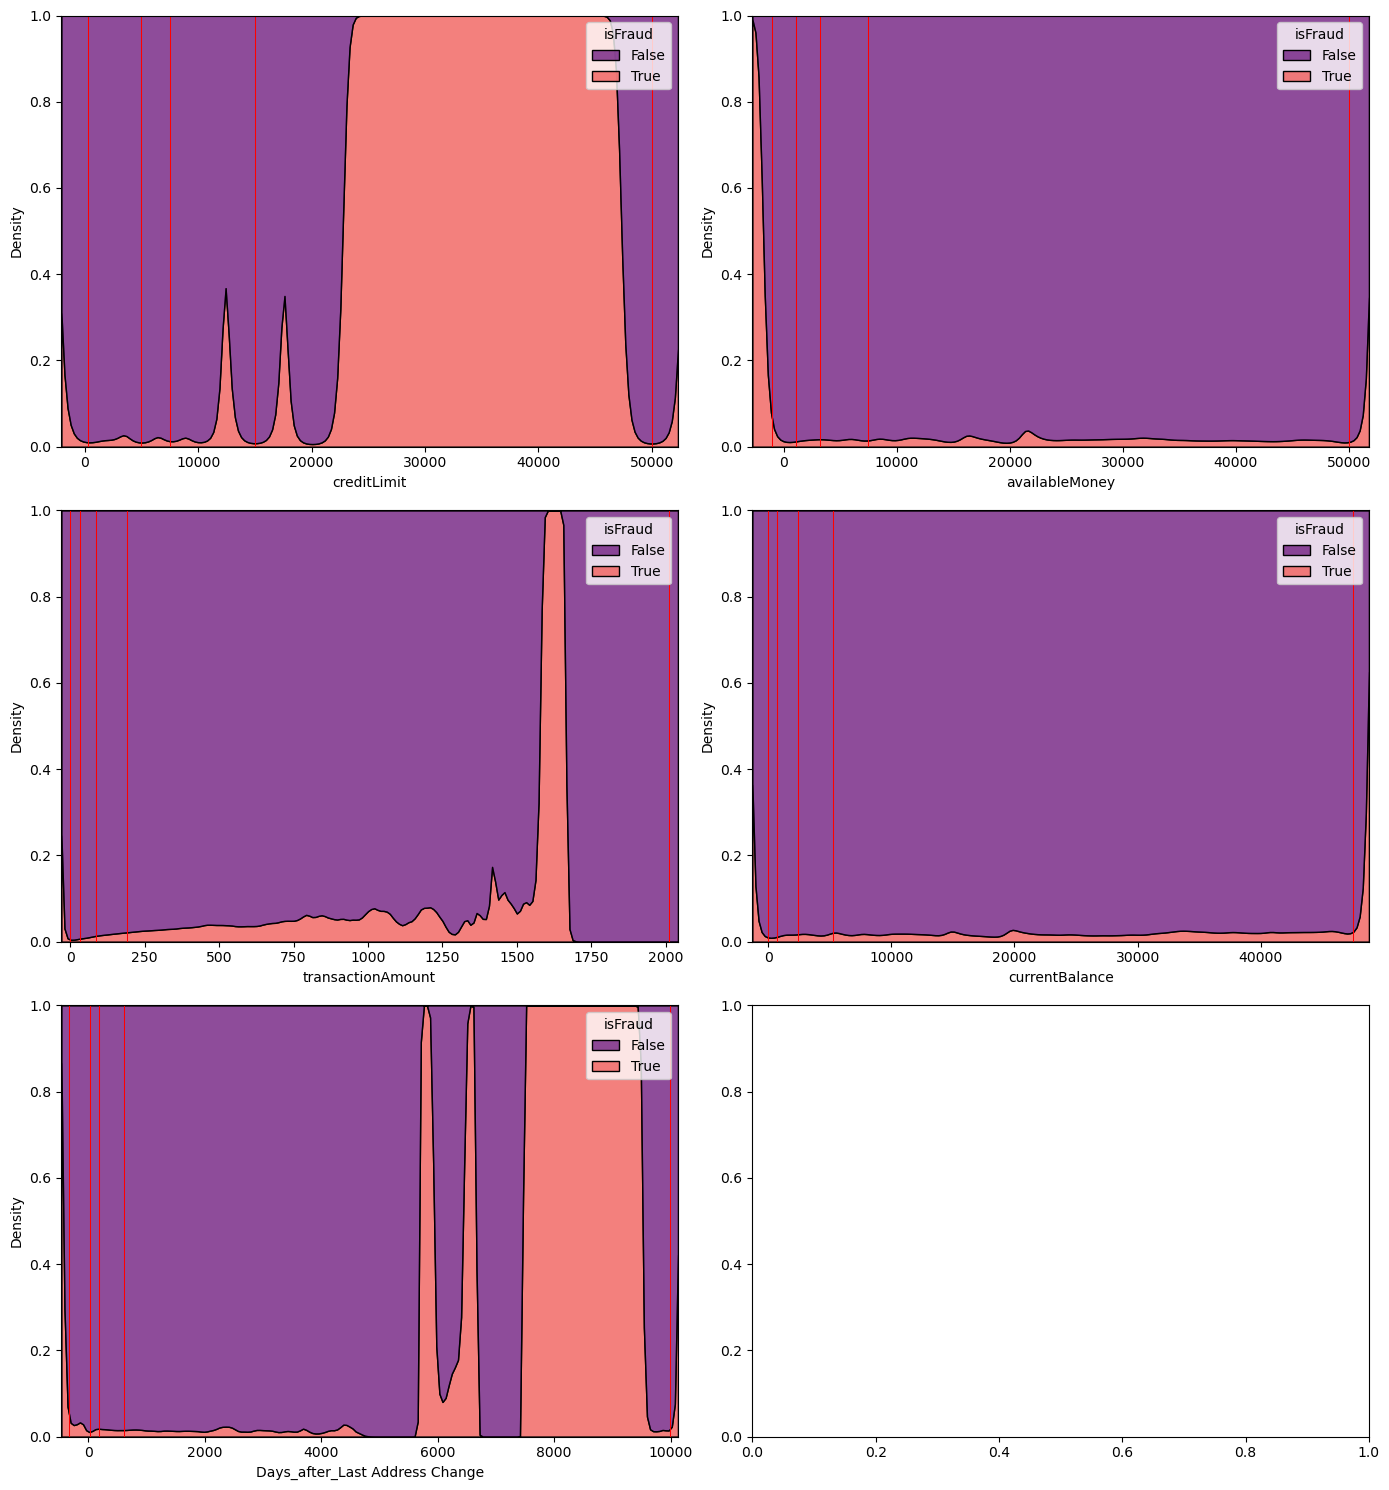

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (14, 15))
for indx, (column, axes) in list(enumerate(list(zip(trxn_num, ax.flatten())))):
    sns.kdeplot(ax = axes, x = trxn_c1[column],hue = trxn_c1['isFraud'],
    palette = 'magma', alpha = 0.8, multiple = 'fill')
    legend = axes.get_legend()
    handles = legend.legendHandles
    legend.remove()
    axes.legend(handles, [False, True], title = 'isFraud', loc = 'upper right')
    Quantiles = np.quantile(trxn_c1[column], [0, 0.25, 0.50, 0.75, 1])
    for q in Quantiles: axes.axvline(x = q, linewidth = 0.75, color = 'r')
plt.tight_layout()
plt.show()

>

## Bivariate Analysis (Cat Vs Target) Variables

> Performing Satats test for all cat variables vs Target Variables

In [ ]:
alpha = 0.05
p_values_df = pd.DataFrame(columns=['Column', 'p-value chi2_contingency', 'result'])

for i in trxn_cat:
    chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(trxn_c1[i], trxn_c1['isFraud']))
    if p_value < alpha:
        result_1 = f"There is significant association between the two variables and we reject the null hypothesis"
    else:
        result_1 = f"There is no significant association between the two variables and we fail to reject the null hypothesis"
    p_values_df = p_values_df.append({'Column': i, 'p-value chi2_contingency': f'{p_value:.4f}', 'result': result_1 }, ignore_index=True)

In [ ]:
p_values_df #Storing P values in Dataframe and Result to check the Significance between the Independent Variables and Target Varaibles

,Column,p-value chi2_contingency,result
0,acqCountry,0.0067,There is significant association between the t...
1,merchantCountryCode,0.0049,There is significant association between the t...
2,posEntryMode,0.0000,There is significant association between the t...
3,posConditionCode,0.0000,There is significant association between the t...
4,merchantCategoryCode,0.0000,There is significant association between the t...
5,transactionType,0.0000,There is significant association between the t...
6,cardPresent,0.0000,There is significant association between the t...
7,expirationDateKeyInMatch,0.4605,There is no significant association between th...
8,isFraud,0.0000,There is significant association between the t...
9,transcation_month,0.0000,There is significant association between the t...


In [ ]:
p_values_df.to_csv('p_values_df.csv', index=True)

> AcqCountry Vs Fraud

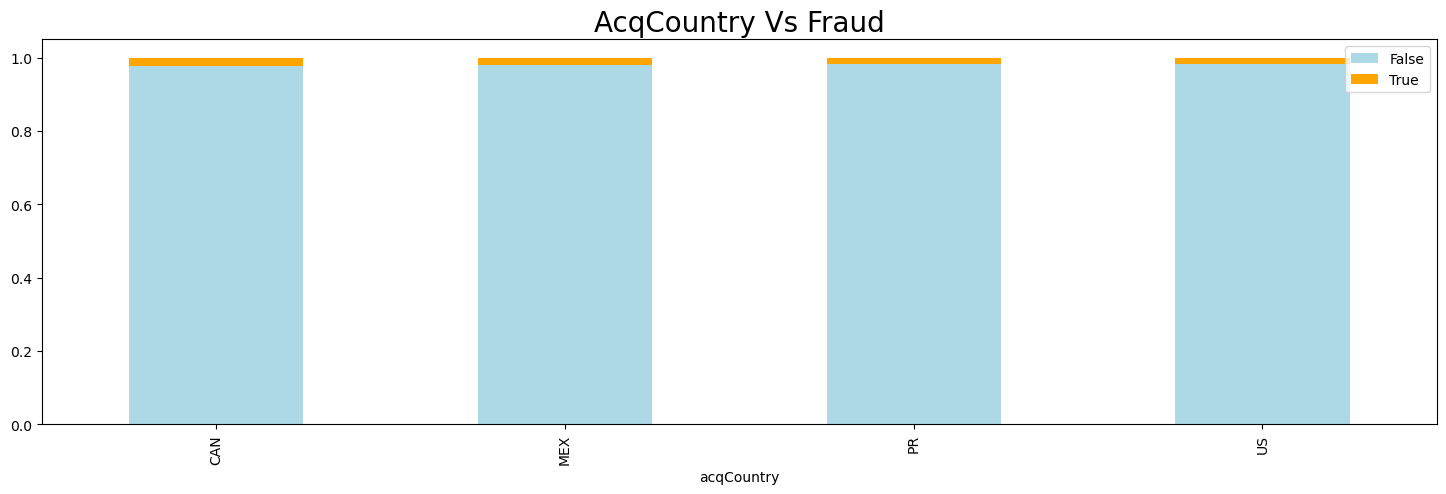

In [ ]:
plt.rcParams['figure.figsize'] = (18, 5)
Y = pd.crosstab(trxn_c1['acqCountry'], trxn_c1['isFraud'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['lightblue','orange'])
plt.title('AcqCountry Vs Fraud', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()


> Pos Entry Mode Transaction Vs Fraud

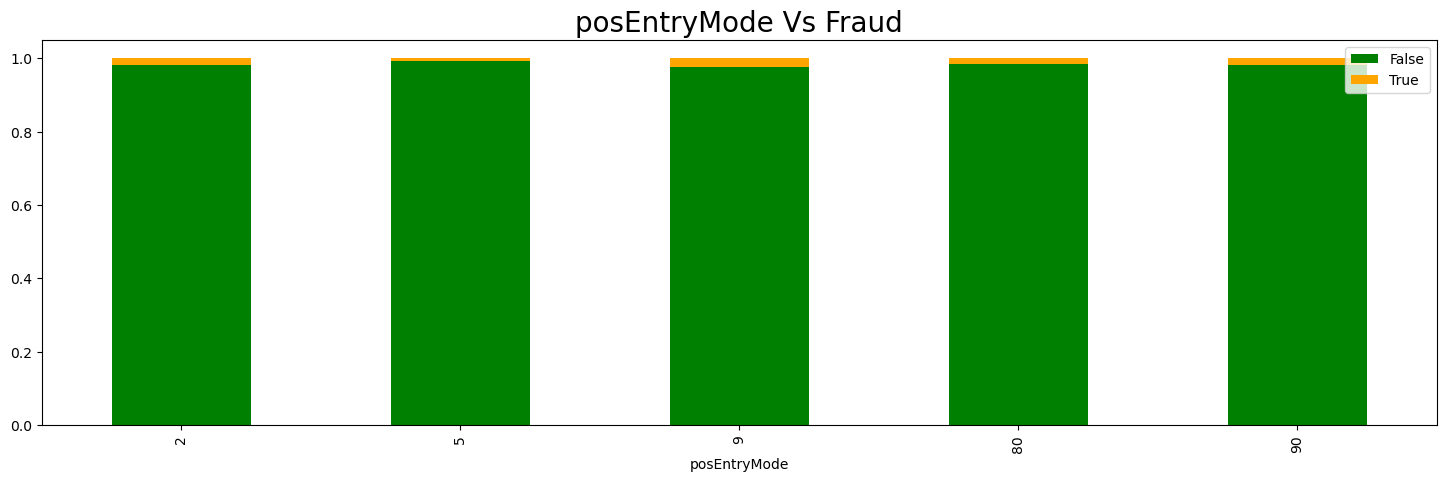

In [ ]:
plt.rcParams['figure.figsize'] = (18, 5)
Y = pd.crosstab(trxn_c1['posEntryMode'], trxn_c1['isFraud'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['green', 'orange'])
plt.title('posEntryMode Vs Fraud', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

> Pos Condition Code Vs Fraud

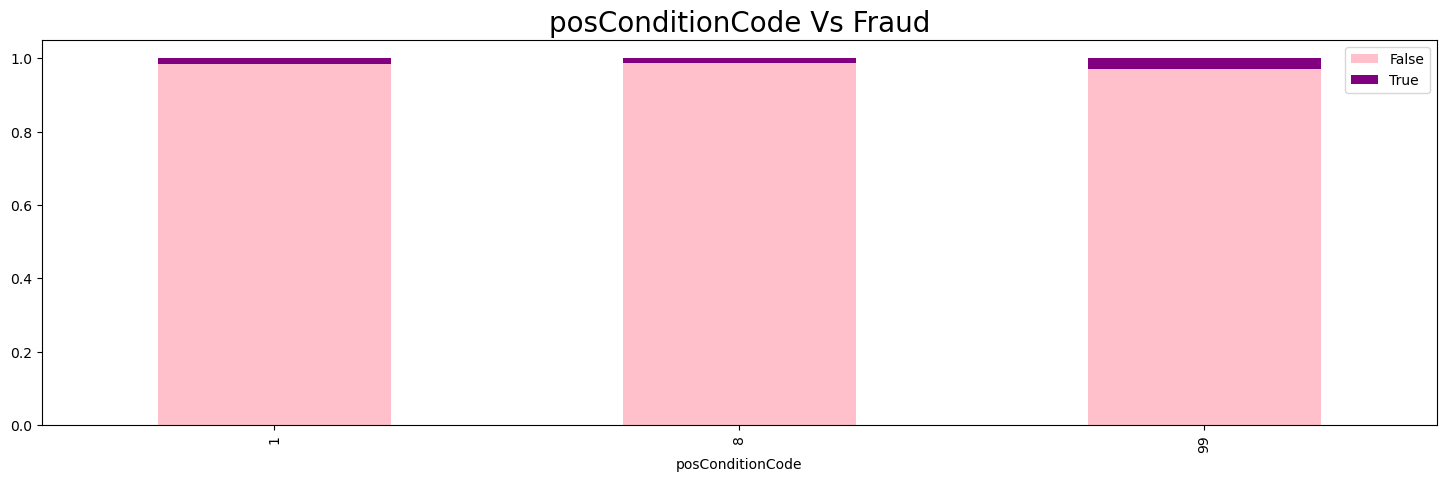

In [ ]:
plt.rcParams['figure.figsize'] = (18, 5)
Y = pd.crosstab(trxn_c1['posConditionCode'], trxn_c1['isFraud'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['pink', 'purple'])
plt.title('posConditionCode Vs Fraud', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Merchant Category Code vs Fraud

Autopct Values for 'True' Values:
airline: 4%
auto: 2%
cable/phone: 0%
entertainment: 8%
fastfood: 9%
food: 8%
food_delivery: 0%
fuel: 0%
furniture: 1%
gym: 0%
health: 1%
hotels: 2%
mobileapps: 0%
online_gifts: 13%
online_retail: 40%
online_subscriptions: 0%
personal care: 1%
rideshare: 10%
subscriptions: 2%

Autopct Values for 'False' Values:
airline: 2%
auto: 3%
cable/phone: 0%
entertainment: 10%
fastfood: 14%
food: 10%
food_delivery: 1%
fuel: 3%
furniture: 1%
gym: 0%
health: 2%
hotels: 4%
mobileapps: 2%
online_gifts: 8%
online_retail: 25%
online_subscriptions: 1%
personal care: 2%
rideshare: 6%
subscriptions: 3%


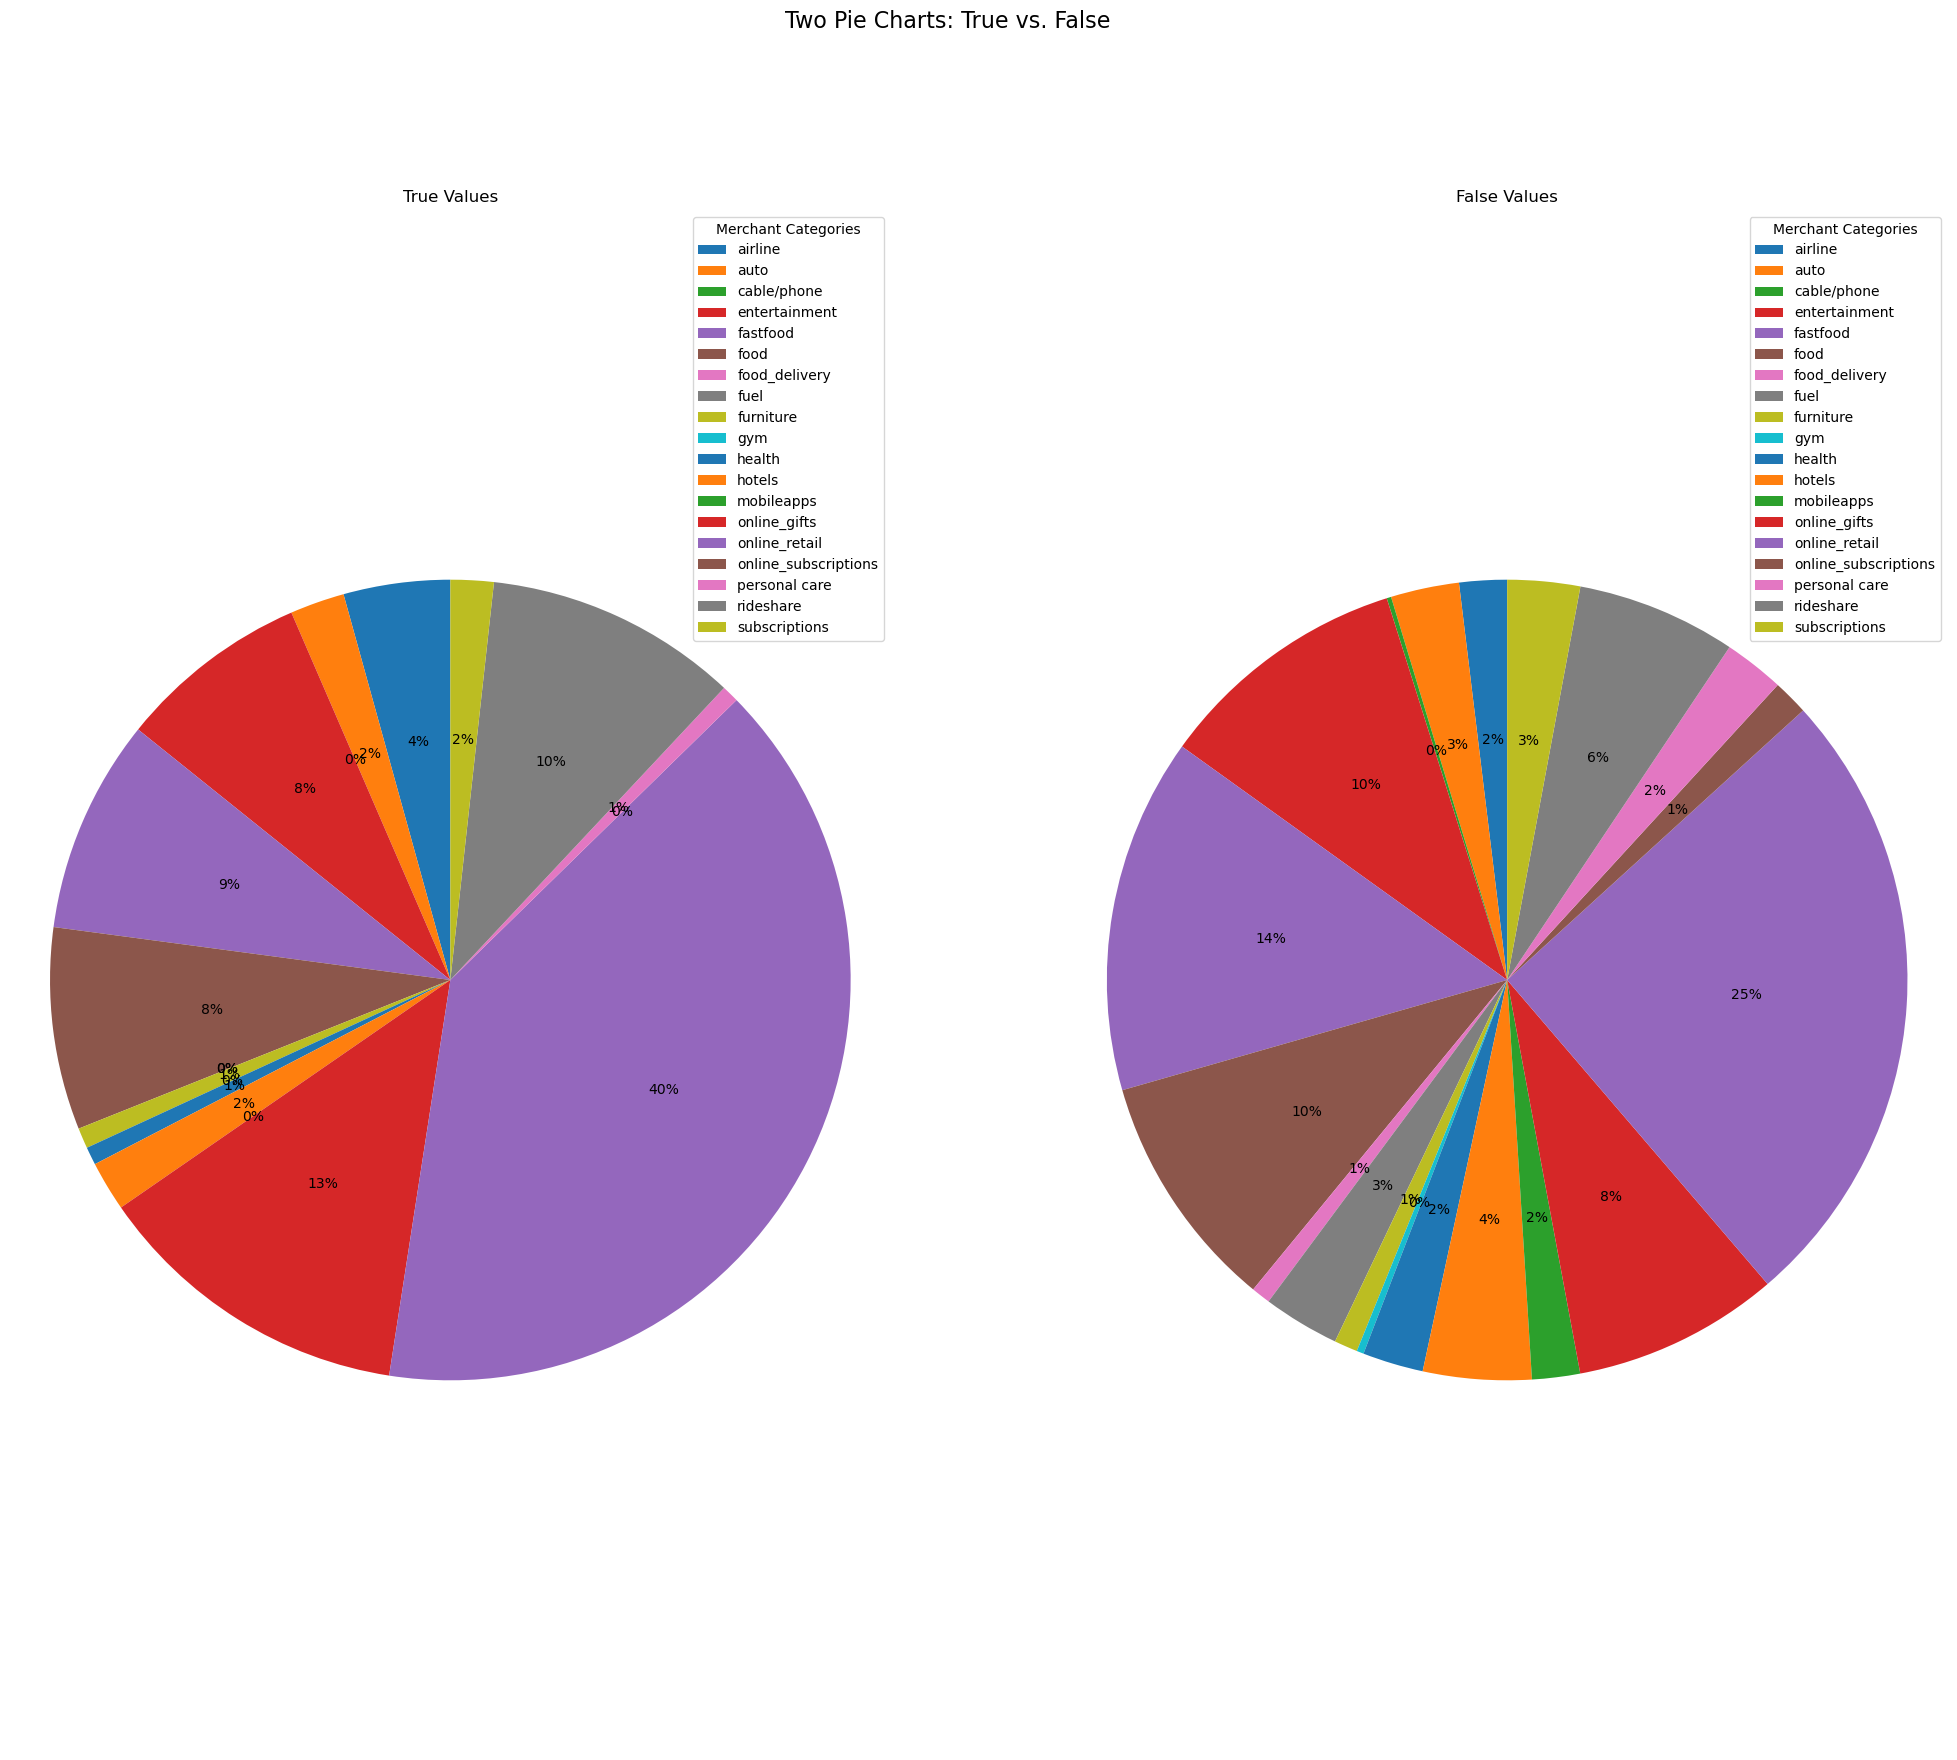

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(25, 20))

counts = trxn_c1.groupby(['merchantCategoryCode', 'isFraud']).size().unstack(fill_value=0)

# Define the explode values for specific categories
explode_true = [0.1 if cat in ['Category1', 'Category2'] else 0 for cat in counts[True].index]
explode_false = [0.1 if cat in ['Category1', 'Category2'] else 0 for cat in counts[False].index]

# Create the first pie chart for 'True' values
_, texts, autotextst = axes[0].pie(counts[True], explode=explode_true, autopct='%1.0f%%', startangle=90)
axes[0].set_title("True Values")
axes[0].axis('equal')

# Create the second pie chart for 'False' values
_, texts, autotextsf = axes[1].pie(counts[False], explode=explode_false, autopct='%1.0f%%', startangle=90)
axes[1].set_title("False Values")
axes[1].axis('equal')

# Extract autopct values and merchant categories for 'True' and 'False' values
autopct_true = [autotextst.get_text() for autotextst in autotextst]
autopct_false = [autotextsf.get_text() for autotextsf in autotextsf]

merchant_categories = counts.index

# Store autopct values with merchant categories for 'True' and 'False' values
autopct_values_true = list(zip(merchant_categories, autopct_true))
autopct_values_false = list(zip(merchant_categories, autopct_false))

# Print autopct values for 'True' and 'False' values
print("Autopct Values for 'True' Values:")
for category, autopct in autopct_values_true:
    print(f"{category}: {autopct}")

print("\nAutopct Values for 'False' Values:")
for category, autopct in autopct_values_false:
    print(f"{category}: {autopct}")

# Add legends
axes[0].legend(labels=counts[True].index, title="Merchant Categories")
axes[1].legend(labels=counts[False].index, title="Merchant Categories")

# Set a common title for the entire figure
fig.suptitle("Two Pie Charts: True vs. False", fontsize=16)

plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame for 'True' values
df_true = pd.DataFrame(autopct_values_true, columns=["Category", "Merchant Fraud Percentage  (True)"])

# Create a DataFrame for 'False' values
df_false = pd.DataFrame(autopct_values_false, columns=["Category", "Merchant Fraud Percentage  (False)"])

result_df = pd.merge(df_true, df_false, on="Category")

result_df

,Category,Merchant Fraud Percentage (True),Merchant Fraud Percentage (False)
0,airline,4%,2%
1,auto,2%,3%
2,cable/phone,0%,0%
3,entertainment,8%,10%
4,fastfood,9%,14%
5,food,8%,10%
6,food_delivery,0%,1%
7,fuel,0%,3%
8,furniture,1%,1%
9,gym,0%,0%


> Transaction Type Vs Fraud

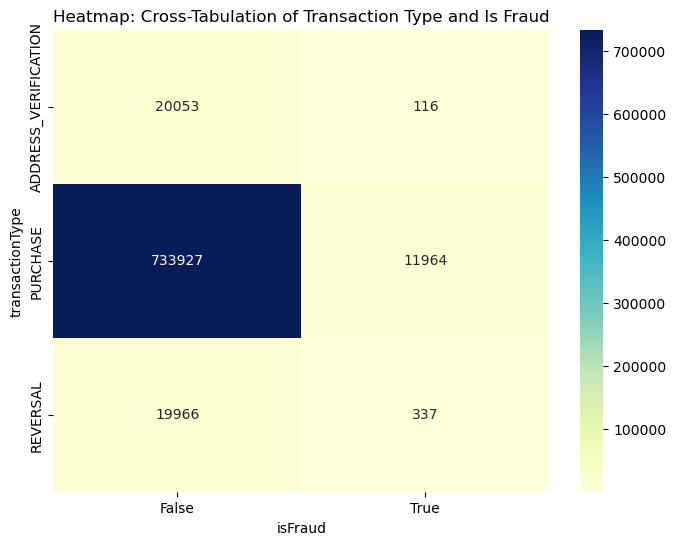

In [ ]:
cross_tab = pd.crosstab(trxn_c1['transactionType'], trxn_c1['isFraud'])
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap: Cross-Tabulation of Transaction Type and Is Fraud")
plt.show()

> Card Present vs Fraud

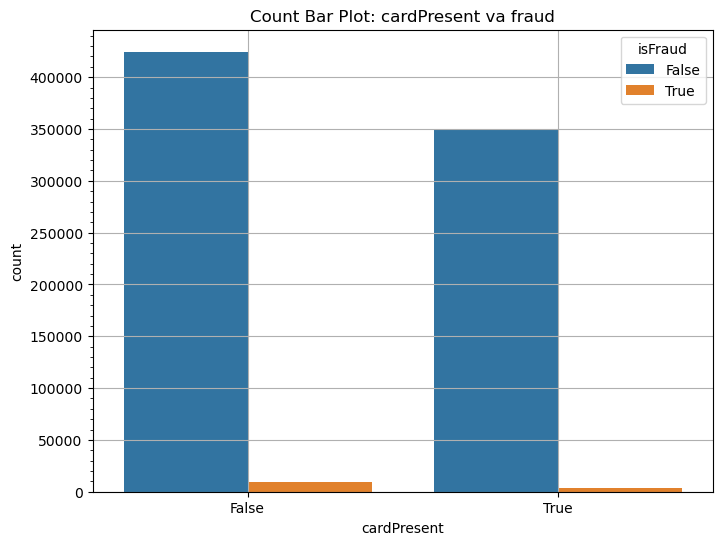

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=trxn_c1, x="cardPresent", hue="isFraud")
plt.title("Count Bar Plot: cardPresent va fraud")
plt.gca().yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.grid()
plt.show()

In [ ]:
dl_list = ['transcation_date','transcation_month','cvv_match']

In [ ]:
fraudulent_merchants = trxn_c1[trxn_c1['isFraud'] == True]

In [ ]:
non_fraudulent_merchants = trxn_c1[trxn_c1['isFraud'] == False]

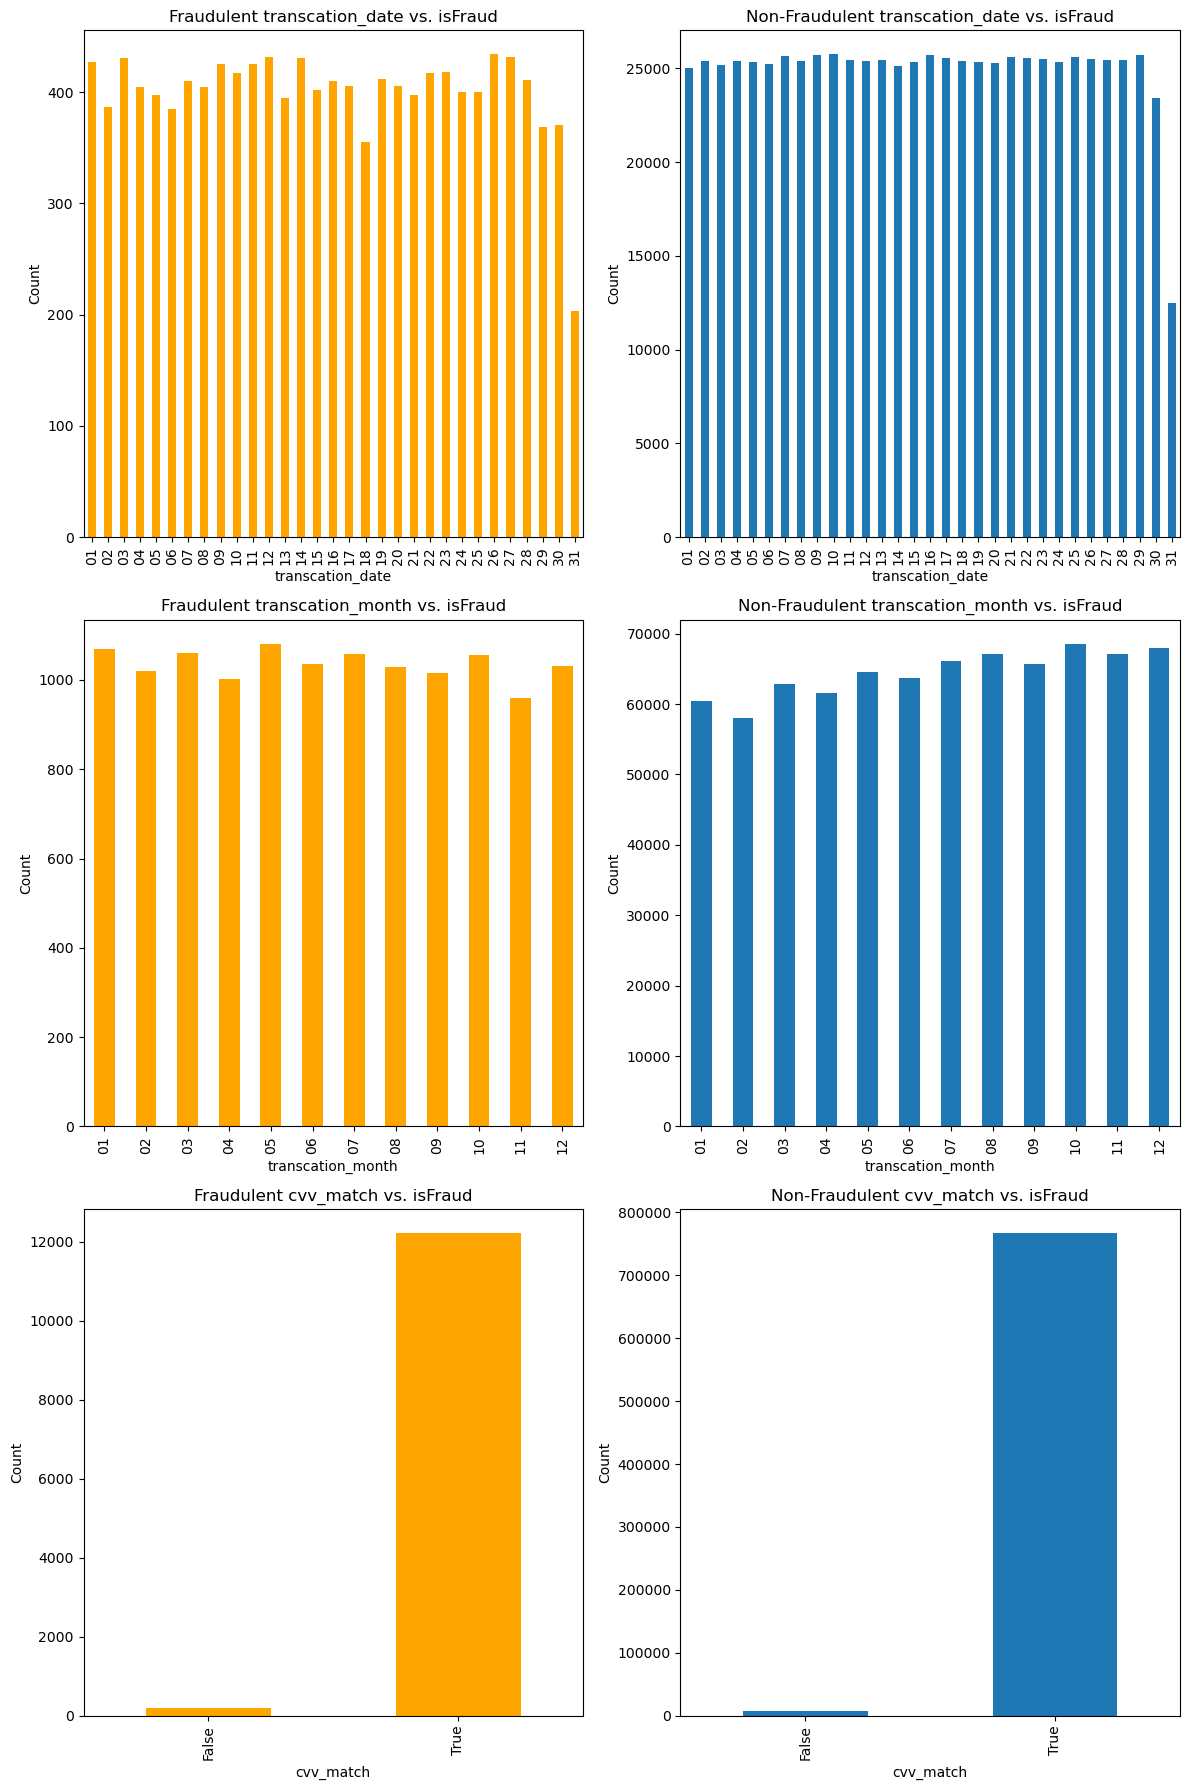

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots with two columns (fraudulent and non-fraudulent)
fig, axes = plt.subplots(nrows=len(dl_list), ncols=2, figsize=(12, 6 * len(dl_list)))

# Assuming fraudulent_merchants and non_fraudulent_merchants are DataFrames
for index, i in enumerate(dl_list):
    # Create crosstabs for fraudulent and non-fraudulent transactions
    crosstab_fraudulent = pd.crosstab(fraudulent_merchants[i], fraudulent_merchants['isFraud'])
    crosstab_non_fraudulent = pd.crosstab(non_fraudulent_merchants[i], non_fraudulent_merchants['isFraud'])

    # Plot the bar charts side by side
    ax1 = crosstab_fraudulent.plot(kind='bar', ax=axes[index, 0], legend=False,color='orange')
    ax1.set_title(f'Fraudulent {i} vs. isFraud')
    ax1.set_xlabel(i)
    ax1.set_ylabel('Count')

    ax2 = crosstab_non_fraudulent.plot(kind='bar', ax=axes[index, 1], legend=False)
    ax2.set_title(f'Non-Fraudulent {i} vs. isFraud')
    ax2.set_xlabel(i)
    ax2.set_ylabel('Count')

# Adjust layout spacing
plt.tight_layout()

# Show the plots
plt.show()

## Multivariate Analysis

> Relation Between Transcation Type vs Current Balance Vs Is Fraud

In [ ]:
def append_stat_result(name_of_stat, result_df, f_statistic, p_value, result):
    """
    Appends statistical results to the given DataFrame.

    Parameters:
    - name_of_stat (str): The name of the statistical test.
    - result_df (pd.DataFrame): The DataFrame to which the results will be appended.
    - f_statistic (float): The F-Statistic value.
    - p_value (float): The P-Value.
    - result (str): The result description.

    Returns:
    - pd.DataFrame: The updated DataFrame.
    """
    new_row = {'name_of_stat': name_of_stat, 'F-Statistic': f'{f_statistic:.4f}', 'P-Value': f'{p_value:.4f}', 'Result': result}
    result_df = result_df.append(new_row, ignore_index=True)
    return result_df

In [ ]:
result_df = pd.DataFrame(columns=['name_of_stat', 'F-Statistic', 'P-Value', 'Result'])

In [ ]:
# Calculate F-statistic and p-value
f_statistic, p_value = stats.f_oneway(
    trxn_c1['currentBalance'][(trxn_c1['transactionType'] == 'PURCHASE') & (trxn_c1['isFraud'] == False)],
    trxn_c1['currentBalance'][(trxn_c1['transactionType'] == 'ADDRESS_VERIFICATION') & (trxn_c1['isFraud'] == False)],
    trxn_c1['currentBalance'][(trxn_c1['transactionType'] == 'REVERSAL') & (trxn_c1['isFraud'] == False)],
    trxn_c1['currentBalance'][(trxn_c1['transactionType'] == 'PURCHASE') & (trxn_c1['isFraud'] == True)],
    trxn_c1['currentBalance'][(trxn_c1['transactionType'] == 'ADDRESS_VERIFICATION') & (trxn_c1['isFraud'] == True)],
    trxn_c1['currentBalance'][(trxn_c1['transactionType'] == 'REVERSAL') & (trxn_c1['isFraud'] == True)]
)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    result = f"There is significant association among the variables and we reject the null hypothesis"
else:
    result = f"There is no significant association among the variables variables and we fail to reject the null hypothesis"

In [ ]:
# Append the results to the DataFrame
result_df = append_stat_result('Transaction Type Vs Current Balance Vs Fraud', result_df, f_statistic, p_value, result)

# Print the DataFrame with the results
result_df

,name_of_stat,F-Statistic,P-Value,Result
0,Transaction Type Vs Current Balance Vs Fraud,23.1160,0.0000,There is significant association among the var...


In [ ]:
# plot , ax = plt.subplots(3 , 1 , figsize=(15,15))
# sns.histplot(data = trxn_c1.loc[trxn_c1['transactionType']=='PURCHASE'] , x = "currentBalance" , hue = "isFraud",binwidth=5,ax = ax[0],palette = sns.color_palette(["blue" , "orange"]),multiple = "stack",log_scale=(False, True)).set_title("Purchase_isFraud")
# sns.histplot(data = trxn_c1.loc[trxn_c1['transactionType']=='REVERSAL'] , x = "currentBalance" , hue = "isFraud",binwidth=5,ax = ax[1],palette = sns.color_palette(["blue" , "orange"]),multiple = "stack",log_scale=(False, True)).set_title("Reversal_isFraud")
# sns.histplot(data = trxn_c1.loc[trxn_c1['transactionType']=='ADDRESS_VERIFICATION'] , x = "currentBalance" , hue = "isFraud",binwidth=5,ax = ax[2],palette = sns.color_palette(["blue" , "orange"]),multiple = "stack",log_scale=(False, True)).set_title("Address_isFraud")
# plt.show()


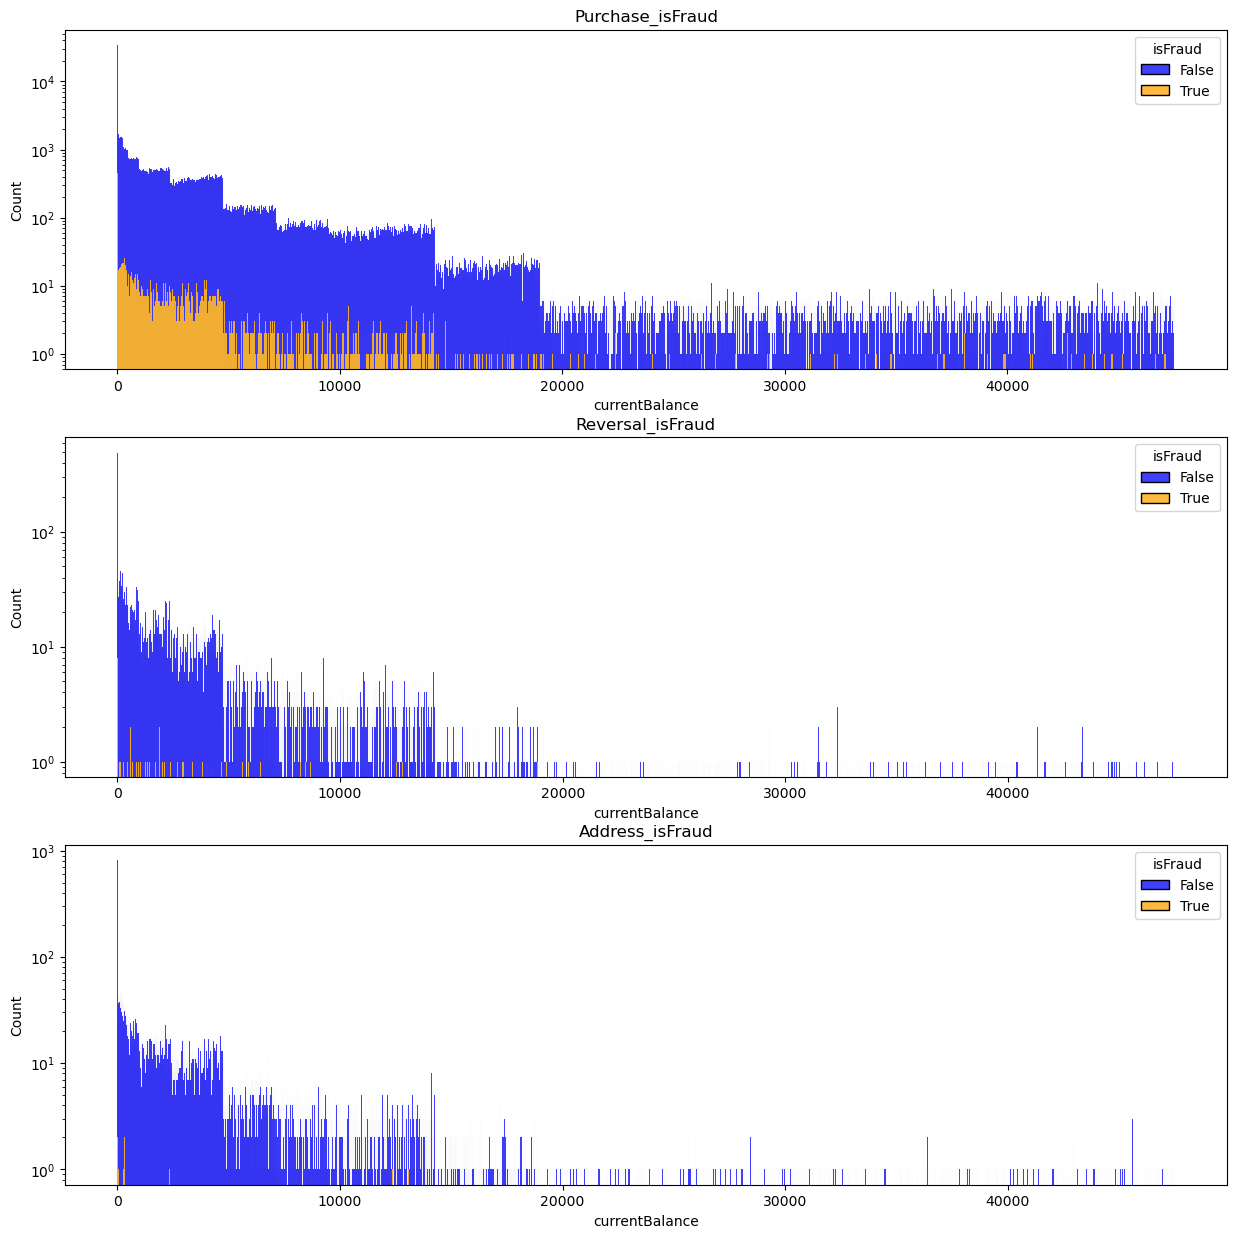

In [ ]:
# Specify the path to the image file
image_path = r'G:\Great Lakes April 2023\Capstone Project\GL Capstone\Fraud70\visualization_images\Multi\Multi (Transaction TYpe vs Current Balance vs Fraud).png'

# Display the image
Image(filename=image_path)


> Relation Card Expriy Month vs Fraud Vs Card Expiry Year

In [ ]:
trxn_c1

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transcation_month,transcation_date,cvv_match,Days_after_Last Address Change
0,5000,5000.00,98.55,US,US,2,1,rideshare,PURCHASE,0.00,False,False,False,08,13,True,518
1,5000,5000.00,74.51,US,US,9,1,entertainment,PURCHASE,0.00,True,False,False,10,11,True,577
2,5000,5000.00,7.47,US,US,9,1,mobileapps,PURCHASE,0.00,False,False,False,11,08,True,605
3,5000,5000.00,7.47,US,US,9,1,mobileapps,PURCHASE,0.00,False,False,False,12,10,True,637
4,5000,5000.00,71.18,US,US,2,1,fastfood,PURCHASE,0.00,True,False,False,03,24,True,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,US,US,90,1,rideshare,PURCHASE,1095.04,False,False,False,12,22,True,1582
786359,50000,48785.04,18.89,US,US,9,1,online_subscriptions,PURCHASE,1214.96,False,False,False,12,25,True,1585
786360,50000,48766.15,49.43,US,US,2,1,rideshare,PURCHASE,1233.85,False,False,False,12,27,True,1587
786361,50000,48716.72,49.89,US,US,9,99,online_retail,PURCHASE,1283.28,False,False,False,12,29,True,1589


> Relation Between Expiration Date Key In Match Vs Fraud Vs CVV Match

In [ ]:
# Calculate F-statistic and p-value
ct = pd.crosstab(trxn_c1['expirationDateKeyInMatch'], [trxn_c1['isFraud'], trxn_c1['cvv_match']])
f_statistic, p_value, _, _ = stats.chi2_contingency(ct)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    result = f"There is significant association among the variables and we reject the null hypothesis"
else:
    result = f"There is no significant association among the variables variables and we fail to reject the null hypothesis"

In [ ]:
# Append the results to the DataFrame
result_df = append_stat_result('Expiration Date Key In Match Vs cvv_match Vs Fraud', result_df, f_statistic, p_value, result)

# Print the DataFrame with the results
result_df

,name_of_stat,F-Statistic,P-Value,Result
0,Transaction Type Vs Current Balance Vs Fraud,23.1160,0.0000,There is significant association among the var...
1,Expiration Date Key In Match Vs cvv_match Vs F...,0.9148,0.8218,There is no significant association among the ...


<Figure size 1000x600 with 0 Axes>

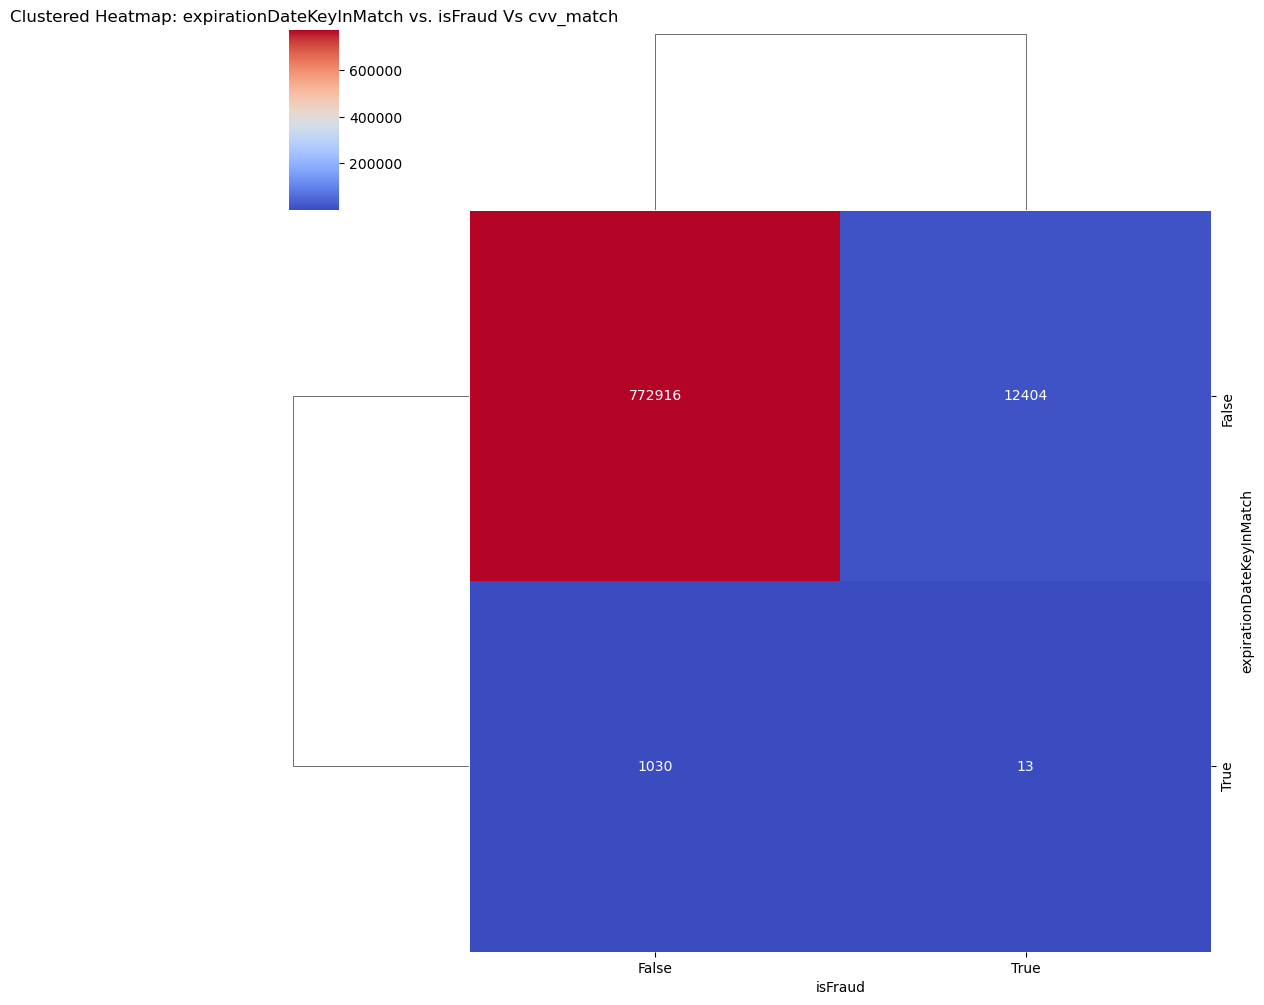

In [ ]:
data = trxn_c1[["expirationDateKeyInMatch", "isFraud", "cvv_match"]]

# Pivot the DataFrame for clustering
pivot_data = data.pivot_table(index="expirationDateKeyInMatch", columns="isFraud", values="cvv_match", aggfunc="count", fill_value=0)

# Create a cluster map
plt.figure(figsize=(10, 6))
sns.clustermap(pivot_data, cmap="coolwarm", annot=True, fmt="d")
plt.title("Clustered Heatmap: expirationDateKeyInMatch vs. isFraud Vs cvv_match")
plt.show()

> Relation in Acquired Country Vs Transaction Amount Vs Fraud

In [ ]:
trxn_c1['acqCountry'].unique()

['US', 'CAN', 'MEX', 'PR']
Categories (4, object): ['CAN', 'MEX', 'PR', 'US']

In [ ]:
# Calculate F-statistic and p-value
f_statistic, p_value = stats.f_oneway(
    trxn_c1['transactionAmount'][(trxn_c1['acqCountry'] == 'US') & (trxn_c1['isFraud'] == False)],
    trxn_c1['transactionAmount'][(trxn_c1['acqCountry'] == 'CAN') & (trxn_c1['isFraud'] == False)],
    trxn_c1['transactionAmount'][(trxn_c1['acqCountry'] == 'MEX') & (trxn_c1['isFraud'] == False)],
    trxn_c1['transactionAmount'][(trxn_c1['acqCountry'] == 'PR') & (trxn_c1['isFraud'] == False)],
    trxn_c1['transactionAmount'][(trxn_c1['acqCountry'] == 'US') & (trxn_c1['isFraud'] == True)],
    trxn_c1['transactionAmount'][(trxn_c1['acqCountry'] == 'CAN') & (trxn_c1['isFraud'] == True)],
    trxn_c1['transactionAmount'][(trxn_c1['acqCountry'] == 'MEX') & (trxn_c1['isFraud'] == True)],
    trxn_c1['transactionAmount'][(trxn_c1['acqCountry'] == 'PR') & (trxn_c1['isFraud'] == True)]

)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    result = f"There is significant association among the variables and we reject the null hypothesis"
else:
    result = f"There is no significant association among the variables variables and we fail to reject the null hypothesis"

In [ ]:
# Append the results to the DataFrame
result_df = append_stat_result('Transaction Amount Vs Acq Country Vs Fraud', result_df, f_statistic, p_value, result)

# Print the DataFrame with the results
result_df

,name_of_stat,F-Statistic,P-Value,Result
0,Transaction Type Vs Current Balance Vs Fraud,23.1160,0.0000,There is significant association among the var...
1,Expiration Date Key In Match Vs cvv_match Vs F...,0.9148,0.8218,There is no significant association among the ...
2,Transaction Amount Vs Acq Country Vs Fraud,647.0067,0.0000,There is significant association among the var...


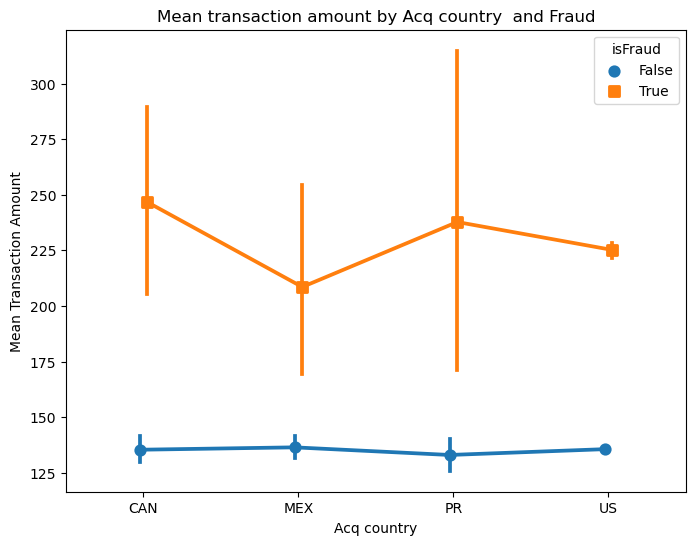

In [ ]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=trxn_c1, x="acqCountry", y="transactionAmount", hue="isFraud", dodge=True, markers=["o", "s"])
plt.title("Mean transaction amount by Acq country  and Fraud")
plt.xlabel("Acq country")
plt.ylabel("Mean Transaction Amount")
plt.show()


> Relation in Acquired Country Vs Available Money Vs Fraud

In [ ]:
# Calculate F-statistic and p-value
f_statistic, p_value = stats.f_oneway(
    trxn_c1['availableMoney'][(trxn_c1['acqCountry'] == 'US') & (trxn_c1['isFraud'] == False)],
    trxn_c1['availableMoney'][(trxn_c1['acqCountry'] == 'CAN') & (trxn_c1['isFraud'] == False)],
    trxn_c1['availableMoney'][(trxn_c1['acqCountry'] == 'MEX') & (trxn_c1['isFraud'] == False)],
    trxn_c1['availableMoney'][(trxn_c1['acqCountry'] == 'PR') & (trxn_c1['isFraud'] == False)],
    trxn_c1['availableMoney'][(trxn_c1['acqCountry'] == 'US') & (trxn_c1['isFraud'] == True)],
    trxn_c1['availableMoney'][(trxn_c1['acqCountry'] == 'CAN') & (trxn_c1['isFraud'] == True)],
    trxn_c1['availableMoney'][(trxn_c1['acqCountry'] == 'MEX') & (trxn_c1['isFraud'] == True)],
    trxn_c1['availableMoney'][(trxn_c1['acqCountry'] == 'PR') & (trxn_c1['isFraud'] == True)]

)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    result = f"There is significant association among the variables and we reject the null hypothesis"
else:
    result = f"There is no significant association among the variables variables and we fail to reject the null hypothesis"

In [ ]:
# Append the results to the DataFrame
result_df = append_stat_result('Available Money Vs Acq Country Vs Fraud', result_df, f_statistic, p_value, result)

# Print the DataFrame with the results
result_df

,name_of_stat,F-Statistic,P-Value,Result
0,Transaction Type Vs Current Balance Vs Fraud,23.1160,0.0000,There is significant association among the var...
1,Expiration Date Key In Match Vs cvv_match Vs F...,0.9148,0.8218,There is no significant association among the ...
2,Transaction Amount Vs Acq Country Vs Fraud,647.0067,0.0000,There is significant association among the var...
3,Available Money Vs Acq Country Vs Fraud,1.6843,0.1077,There is no significant association among the ...


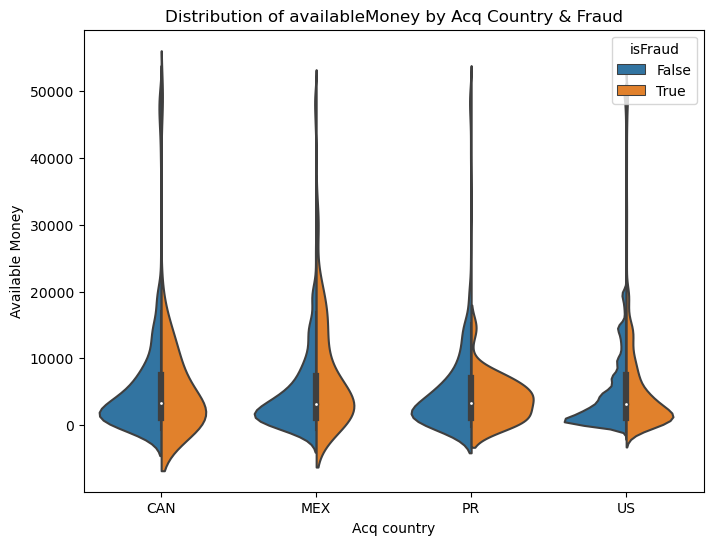

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=trxn_c1, x="acqCountry", y="availableMoney", hue="isFraud", split=True)
plt.title("Distribution of availableMoney by Acq Country & Fraud")
plt.xlabel("Acq country")
plt.ylabel("Available Money")
plt.show()

> Multivaraiate Statisticall Test

In [ ]:
result_df

,name_of_stat,F-Statistic,P-Value,Result
0,Transaction Type Vs Current Balance Vs Fraud,23.1160,0.0000,There is significant association among the var...
1,Expiration Date Key In Match Vs cvv_match Vs F...,0.9148,0.8218,There is no significant association among the ...
2,Transaction Amount Vs Acq Country Vs Fraud,647.0067,0.0000,There is significant association among the var...
3,Available Money Vs Acq Country Vs Fraud,1.6843,0.1077,There is no significant association among the ...


In [ ]:
result_df.to_csv('Multivaraiate Statisticall Test.csv',index=False)

## Scaling the Data

In [ ]:
ss = StandardScaler ()

In [ ]:
trxn_num

['creditLimit',
 'availableMoney',
 'transactionAmount',
 'currentBalance',
 'Days_after_Last Address Change']

In [ ]:
for i in trxn_num:
    trxn_c1[i] =  ss.fit_transform(trxn_c1[[i]])

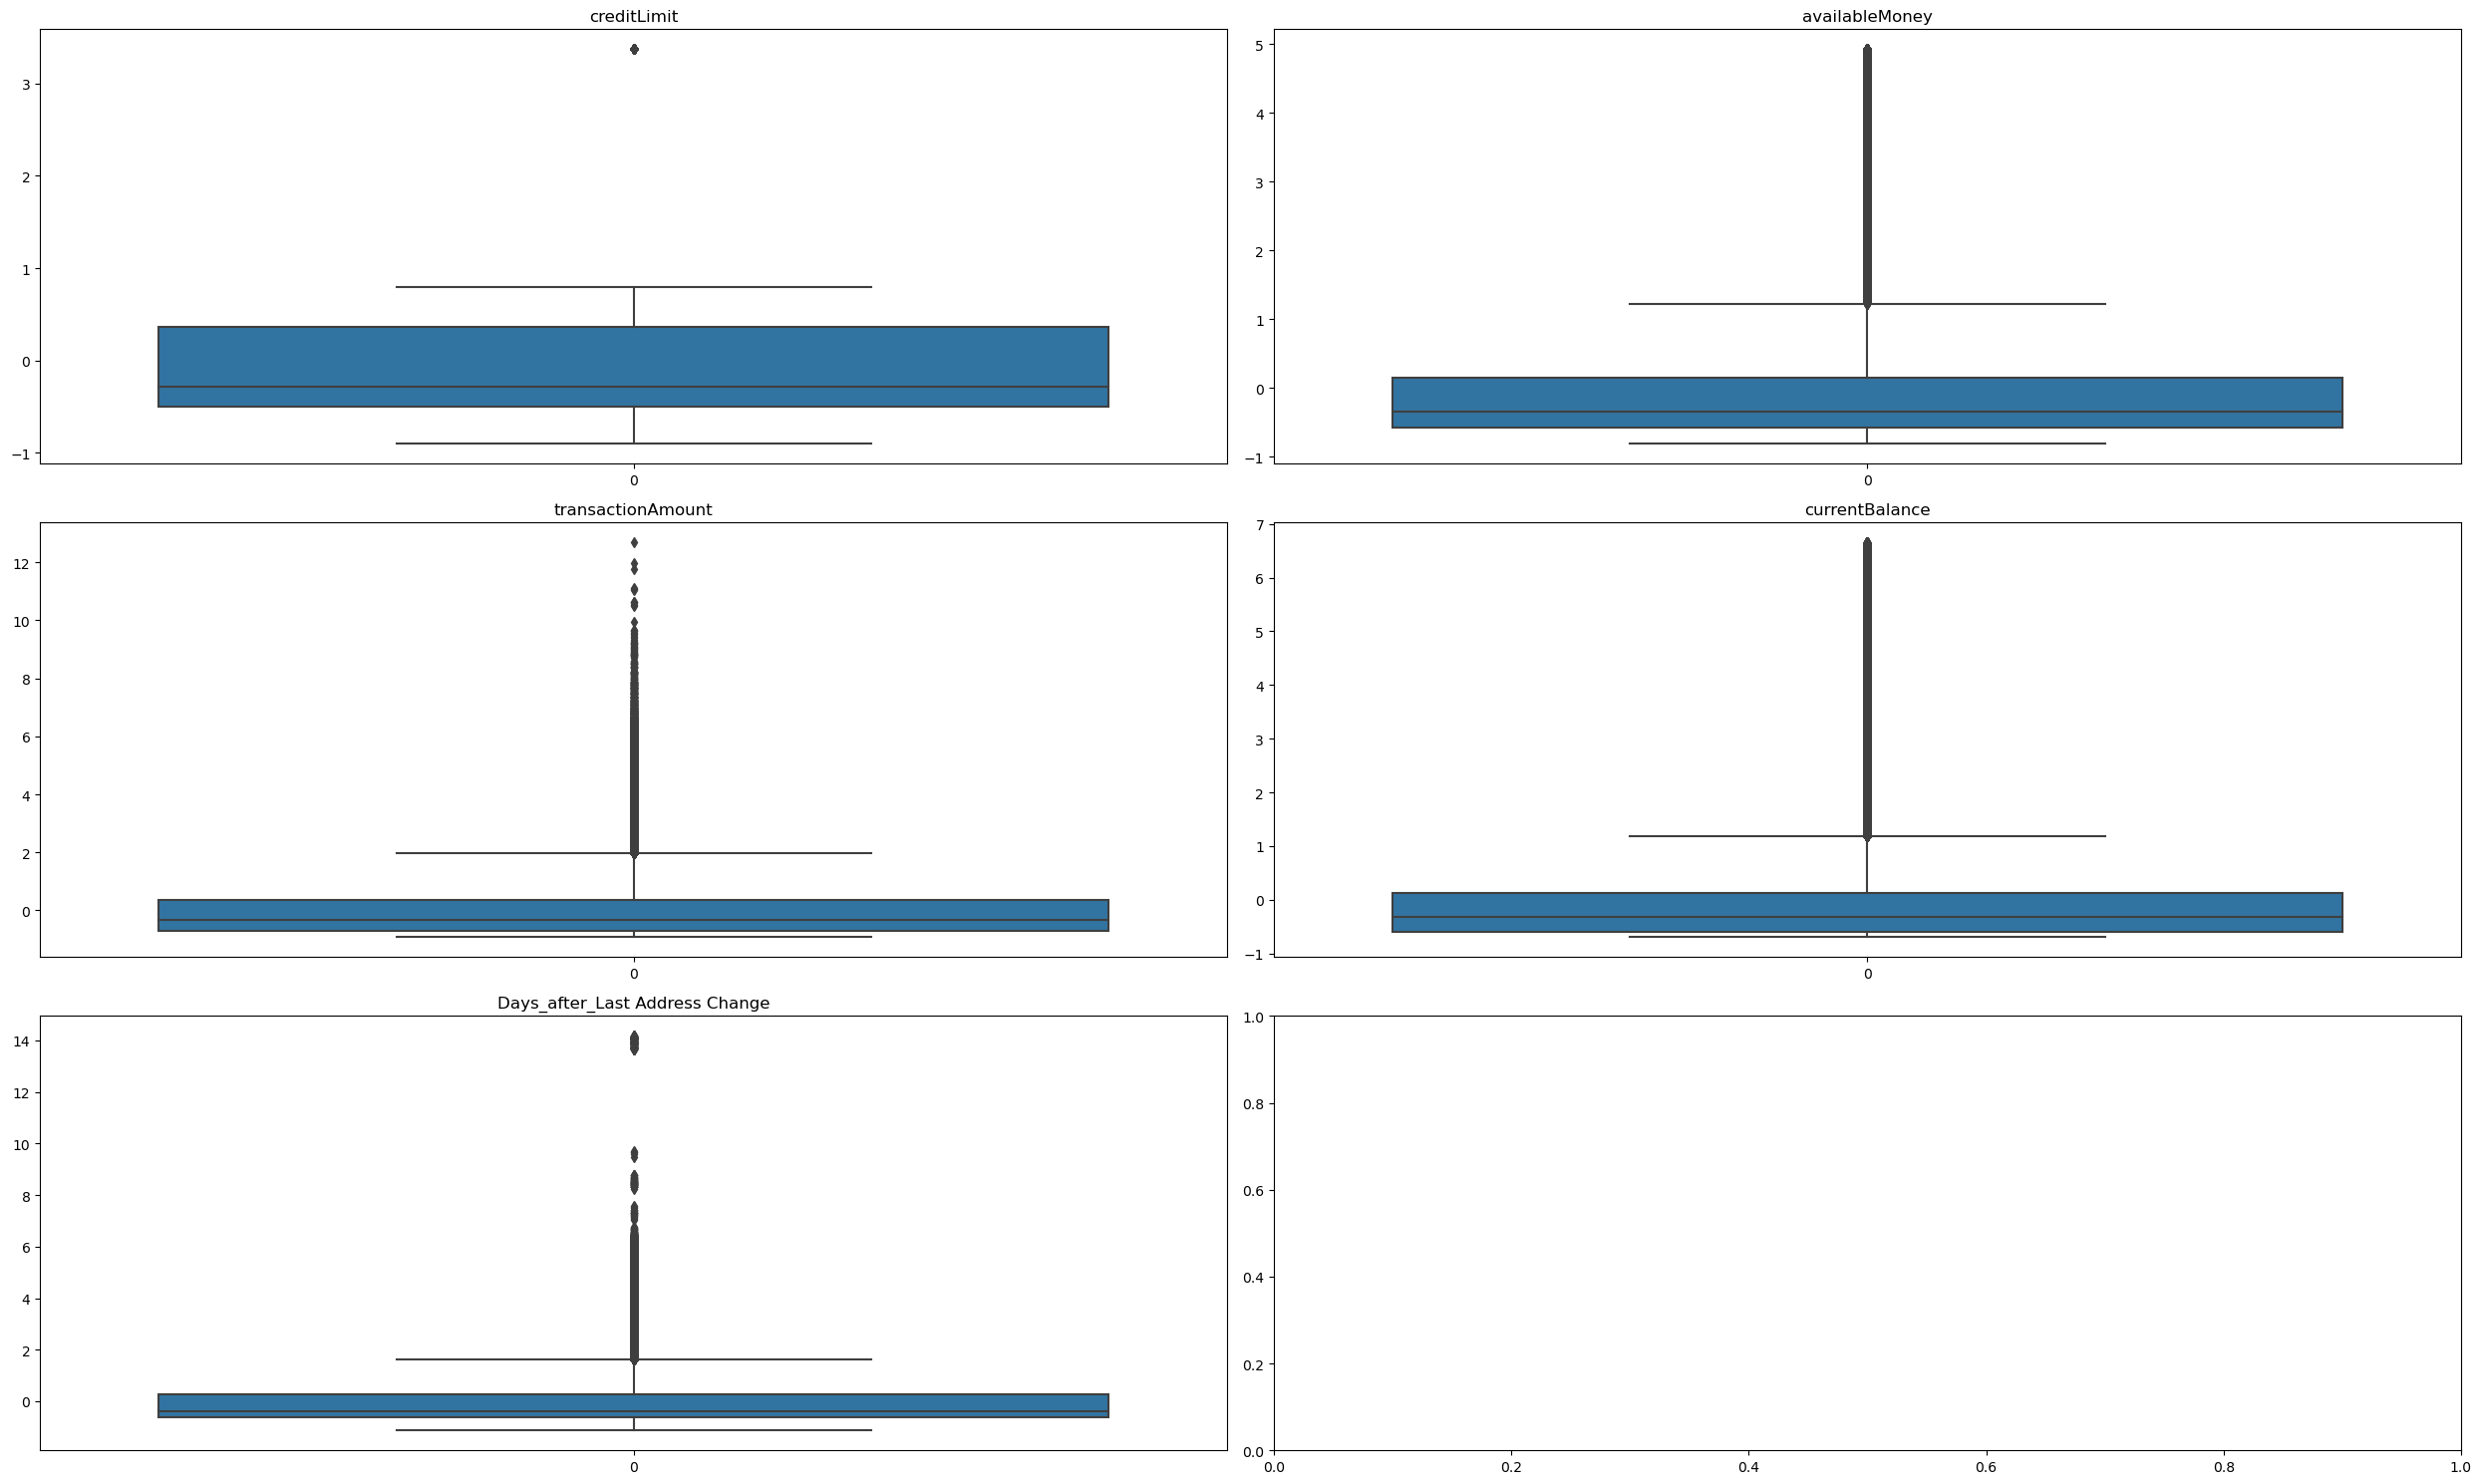

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(25, 15))

for i, subplot in zip(trxn_num, ax.flatten()):
    sns.boxplot(trxn_c1[i], ax=subplot)
    subplot.set_title(i)

plt.tight_layout()
plt.show()

## **Model building**

> Base Model

> Stratified Sampling with Random State 3

In [ ]:
# RANDOM STATE = 3
# Calculate the sample size for each stratum
stratum_sizes = trxn_c1['merchantCategoryCode'].value_counts()
sample_sizes = (stratum_sizes / stratum_sizes.sum() * stratum_sizes).astype(int)

# Initialize an empty DataFrame for the stratified sample
trxn_stratified_rs3 = pd.DataFrame()

# Perform stratified sampling for each stratum
for stratum, sample_size in sample_sizes.iteritems():
    stratum_data = trxn_c1[trxn_c1['merchantCategoryCode'] == stratum]
    stratum_sample = stratum_data.sample(sample_size, random_state=3)
    trxn_stratified_rs3 = pd.concat([trxn_stratified_rs3, stratum_sample])

# Reset the index of the trxn_stratified_rs3 DataFrame
trxn_stratified_rs3.reset_index(drop=True, inplace=True)

# 'trxn_stratified_rs3' now contains the stratified sample with the desired total sample size
trxn_stratified_rs3.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transcation_month,transcation_date,cvv_match,Days_after_Last Address Change
0,-0.280115,0.016866,-0.228233,US,US,2,8,online_retail,PURCHASE,-0.527957,False,False,False,07,07,True,0.007258
1,-0.709810,-0.512280,-0.770455,US,US,5,8,online_retail,PURCHASE,-0.574534,False,False,False,02,09,True,-0.630378
2,0.794122,-0.334239,-0.474636,US,US,9,1,online_retail,PURCHASE,1.890663,False,False,False,06,30,True,0.310469
3,-0.280115,0.140672,0.053980,US,US,5,1,online_retail,PURCHASE,-0.698224,False,False,False,04,02,True,-0.636324
4,0.794122,0.917492,3.212203,US,US,9,1,online_retail,PURCHASE,0.169183,False,False,False,03,24,True,0.259934


## Proof Reading if My Sample Target Variable have the Similar Porportion to Target Variable of Sample Population

In [ ]:
trxn_stratified_rs3['isFraud'].value_counts(normalize=True)*100

False    98.100902
True      1.899098
Name: isFraud, dtype: float64

> yes it Is Similar to Sample Poppulation

In [ ]:
trxn_stratified_rs3.shape

(97520, 17)

## Encoding Sample of Random State 3 Before SMOTE

In [ ]:
LE = LabelEncoder()

In [ ]:
trxn_stratified_rs3.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transcation_month,transcation_date,cvv_match,Days_after_Last Address Change
0,-0.280115,0.016866,-0.228233,US,US,2,8,online_retail,PURCHASE,-0.527957,False,False,False,07,07,True,0.007258
1,-0.709810,-0.512280,-0.770455,US,US,5,8,online_retail,PURCHASE,-0.574534,False,False,False,02,09,True,-0.630378
2,0.794122,-0.334239,-0.474636,US,US,9,1,online_retail,PURCHASE,1.890663,False,False,False,06,30,True,0.310469
3,-0.280115,0.140672,0.053980,US,US,5,1,online_retail,PURCHASE,-0.698224,False,False,False,04,02,True,-0.636324
4,0.794122,0.917492,3.212203,US,US,9,1,online_retail,PURCHASE,0.169183,False,False,False,03,24,True,0.259934


In [ ]:
to_encode = ['acqCountry','merchantCategoryCode','merchantCountryCode','transactionType','cardPresent','expirationDateKeyInMatch','isFraud','cvv_match']

In [ ]:
for i in to_encode:
    trxn_stratified_rs3[i] = LE.fit_transform(trxn_stratified_rs3[i])

In [ ]:
trxn_stratified_rs3[['acqCountry','merchantCategoryCode','merchantCountryCode','transactionType','cardPresent','expirationDateKeyInMatch','isFraud','cvv_match']].head()

,acqCountry,merchantCategoryCode,merchantCountryCode,transactionType,cardPresent,expirationDateKeyInMatch,isFraud,cvv_match
0,3,14,3,1,0,0,0,1
1,3,14,3,1,0,0,0,1
2,3,14,3,1,0,0,0,1
3,3,14,3,1,0,0,0,1
4,3,14,3,1,0,0,0,1


> Proof Reading if all my Variables are encoded

In [ ]:
trxn_stratified_rs3.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transcation_month,transcation_date,cvv_match,Days_after_Last Address Change
0,-0.280115,0.016866,-0.228233,3,3,2,8,14,1,-0.527957,0,0,0,07,07,1,0.007258
1,-0.709810,-0.512280,-0.770455,3,3,5,8,14,1,-0.574534,0,0,0,02,09,1,-0.630378
2,0.794122,-0.334239,-0.474636,3,3,9,1,14,1,1.890663,0,0,0,06,30,1,0.310469
3,-0.280115,0.140672,0.053980,3,3,5,1,14,1,-0.698224,0,0,0,04,02,1,-0.636324
4,0.794122,0.917492,3.212203,3,3,9,1,14,1,0.169183,0,0,0,03,24,1,0.259934


> Since we Converted our Pre Encoded Independent Varaible to Category and Object for our Analysis purposes now we change them back to Numerical Format for Model Building

> Also Based on our Analysis and Logical understanding There is no Relationship with **Feature Engineered Varibale(Related to Date,Month,Year)** & **Target Varaible**  we will also remove them from our **Stratified Sample**

> Change the Variable to int

In [ ]:
trxn_stratified_rs3.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transcation_month,transcation_date,cvv_match,Days_after_Last Address Change
0,-0.280115,0.016866,-0.228233,3,3,2,8,14,1,-0.527957,0,0,0,07,07,1,0.007258
1,-0.709810,-0.512280,-0.770455,3,3,5,8,14,1,-0.574534,0,0,0,02,09,1,-0.630378
2,0.794122,-0.334239,-0.474636,3,3,9,1,14,1,1.890663,0,0,0,06,30,1,0.310469
3,-0.280115,0.140672,0.053980,3,3,5,1,14,1,-0.698224,0,0,0,04,02,1,-0.636324
4,0.794122,0.917492,3.212203,3,3,9,1,14,1,0.169183,0,0,0,03,24,1,0.259934


In [ ]:
dtype_to_change = ['posEntryMode', 'posConditionCode', 'transcation_month', 'transcation_date' ]

for i in dtype_to_change:
    trxn_stratified_rs3[i] = trxn_stratified_rs3[i].astype('int')

In [ ]:
trxn_stratified_rs3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97520 entries, 0 to 97519
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   creditLimit                     97520 non-null  float64
 1   availableMoney                  97520 non-null  float64
 2   transactionAmount               97520 non-null  float64
 3   acqCountry                      97520 non-null  int32  
 4   merchantCountryCode             97520 non-null  int32  
 5   posEntryMode                    97520 non-null  int32  
 6   posConditionCode                97520 non-null  int32  
 7   merchantCategoryCode            97520 non-null  int32  
 8   transactionType                 97520 non-null  int32  
 9   currentBalance                  97520 non-null  float64
 10  cardPresent                     97520 non-null  int32  
 11  expirationDateKeyInMatch        97520 non-null  int32  
 12  isFraud                         

> Variable for Storing the All Model Performance Here on  

In [ ]:
perf_score = pd.DataFrame(columns=["Model",'test_size',"Accuracy","Recall","Precision","F1 Score"] )

In [ ]:
def per_measures(model,test,pred):
    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
    # aic         =model.aic
    # reliability = cohen_kappa_score(test,pred)
    return(accuracy,recall,precision,f1score)

In [ ]:
def update_performance (name,
                        test_size,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'test_size'   : test_size,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)

##  Before We Jump to Model building We are Now Check for Assumption Logisting Regression

> Binary or ordinal outcome variable: The dependent variable in logistic regression must be binary (two outcomes) or ordinal (multiple outcomes with a natural order).

> No multicollinearity: The independent variables should not be too highly correlated with each other.

> Independence of observations: The observations in the dataset should be independent of each other.

>Sufficiently large sample size: The sample size should be large enough to produce reliable results.

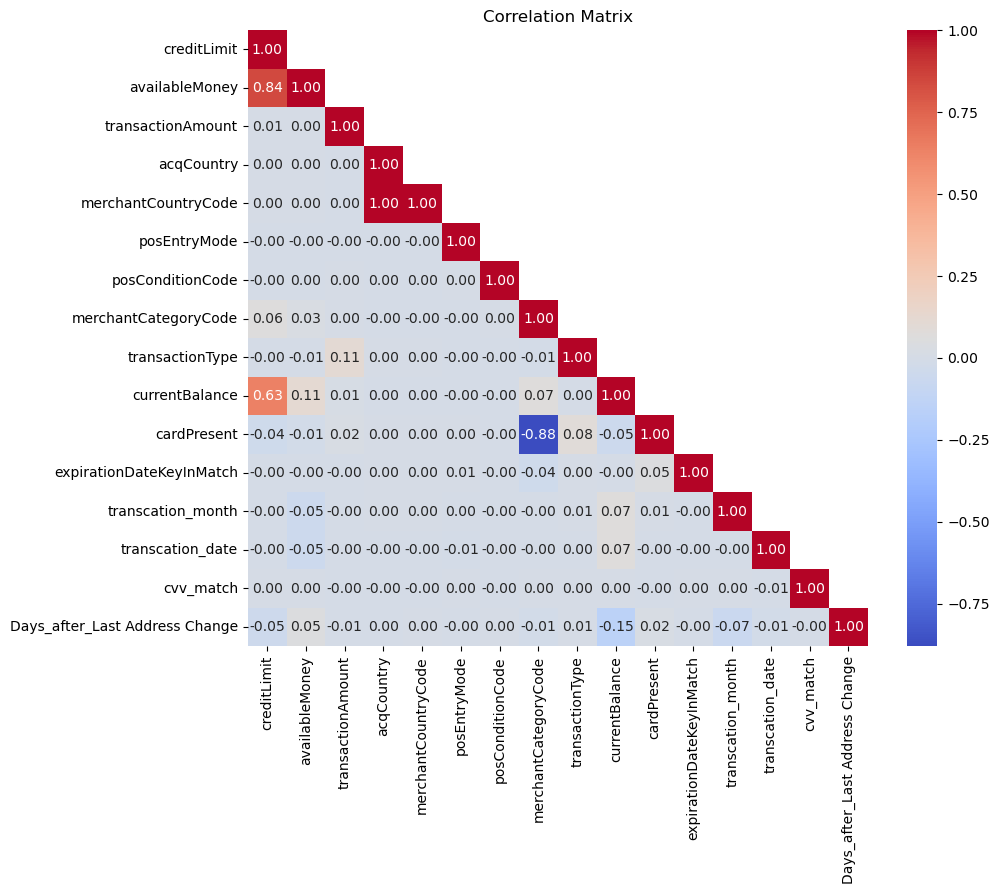

,Assumption,Result
0,Binary Outcome Variable,The outcome variable is binary.
1,Sufficiently Large Sample Size,Sample size is sufficiently large.


In [ ]:
# Define the dependent and independent variables
y = trxn_stratified_rs3['isFraud']
X = trxn_stratified_rs3.drop('isFraud', axis=1)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

# Check the assumptions of logistic regression
assumption_results = []

# 1. Binary or ordinal outcome variable
if len(y.unique()) != 2:
    outcome_var_result = 'The outcome variable is not binary.'
else:
    outcome_var_result = 'The outcome variable is binary.'

# 3. No multicollinearity (Usually assessed before modeling)
correlation_matrix = X.corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",mask=np.triu(correlation_matrix,+1))
plt.title('Correlation Matrix')
plt.show()

# 5. Sufficiently large sample size (Assess before modeling)
sample_size = int(100 * (1 - model.score(X, y)) / (model.score(X, y) * 0.20**2))
sample_size_result = 'Sample size is sufficiently large.' if len(y) > sample_size else 'Sample size may not be sufficiently large.'

# Store the results in the DataFrame
assumption_results.append({
    'Assumption': 'Binary Outcome Variable',
    'Result': outcome_var_result
})


assumption_results.append({
    'Assumption': 'Sufficiently Large Sample Size',
    'Result': sample_size_result
})

# Create a DataFrame from the results
assumption_df = pd.DataFrame(assumption_results)

# Display the DataFrame
assumption_df


In [ ]:
sample_size

48

In [ ]:
len(y)

97520

In [ ]:
1 - model.score(X, y)

0.019001230516817014

In [ ]:
# assumption_df.to_csv('Assumption Check for Logistic Regression.csv',index=True)

## Applying SMOTE only for Training Data for Random State 3

In [ ]:
# Instantiate SMOTE
smote = SMOTE(random_state=3)

In [ ]:
x3 = trxn_stratified_rs3.drop(columns=['isFraud'],axis=1)
y3 = trxn_stratified_rs3['isFraud']

> Spliting The Data

In [ ]:
xtrain3,xtest3,ytrain3,ytest3 = train_test_split(x3,y3, test_size=0.2, random_state=3)

In [ ]:
#Shape Of the Split Before Applying SMOTE
print(xtrain3.shape,xtest3.shape,ytrain3.shape,ytest3.shape)

(78016, 16) (19504, 16) (78016,) (19504,)


In [ ]:
xtrain3,ytrain3 = smote.fit_resample(xtrain3,ytrain3)

In [ ]:
#Shape Of the Split After Applying SMOTE
print(xtrain3.shape,xtest3.shape,ytrain3.shape,ytest3.shape)

(153048, 16) (19504, 16) (153048,) (19504,)


## Base Model Logistic Regression with Random State 3

In [ ]:
LR3 = LogisticRegression()

In [ ]:
model_rs3_1 = LR3.fit(xtrain3,ytrain3)

In [ ]:
ypred_train_rs3_1 = model_rs3_1.predict(xtrain3)
ypred_test_rs3_1 = model_rs3_1.predict(xtest3)

In [ ]:
update_performance(name='Logistic Regression RS 3 Train',test_size = 0.2,model=LR3,test=ytrain3,pred=ypred_train_rs3_1)

perf_score

,Model,test_size,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression RS 3 Train,0.2,0.652736,0.620746,0.663176,0.64126


In [ ]:
update_performance(name='Logistic Regression RS 3 Test',test_size = 0.2 ,model=LR3,test=ytest3,pred=ypred_test_rs3_1)

perf_score

,Model,test_size,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression RS 3 Train,0.2,0.652736,0.620746,0.663176,0.641260
1,Logistic Regression RS 3 Test,0.2,0.677194,0.591667,0.033480,0.063374


In [ ]:
# Saving all the Performance scores in CSV
perf_score.to_csv('Fraud Model Performance Score.csv',index=False)

In [ ]:
trxn_stratified_rs3.shape

(97520, 17)

In [ ]:
trxn_c1.shape

(786363, 17)